# Info
Name:  

    ORACLES_SSFR_cloud_retrieval

Purpose:  

    Run the cloud retrieval on SSFR data from ORACLES 2016 and 2017, but only on the flagacaod times.
  
Input:

    none

Output:
   
    plots
    mat save files
  
Keywords:

    none
  
Dependencies:

    - numpy
    - matplotlib
    - scipy

  
Needed Files:

  - ...
    
History:

    Written: Samuel LeBlanc,Santa Cruz, CA, 2018-06-29

# Prepare the python environment

In [2]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [4]:
import load_utils as lu
import Sp_parameters as Sp

In [5]:
import hdf5storage as hs
from path_utils import getpath
from write_utils import nearest_neighbor
from tqdm import tqdm_notebook as tqdm
import math

In [6]:
from datetime import datetime 
import plotting_utils as pu

In [7]:
from scipy import interpolate

In [8]:
fp = getpath('ORACLES')
fp

Return path named:  ORACLES /data/sam/ORACLES/


u'/data/sam/ORACLES/'

In [9]:
vv='v3'

# Load files

In [10]:
days = ['20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927']

In [11]:
doy = [datetime(int(d[0:4]),int(d[4:6]),int(d[6:8])).timetuple().tm_yday for d in days]

## Load the SSFR ict files for 2016

In [12]:
ssfr_a, ssfr_ah = [],[]
for d in days:
    sf,sfh = lu.load_ict(fp+'data_other/ssfr/SSFR_P3_{}_R1.ict'.format(d),return_header=True)
    ssfr_a.append(lu.recarray_to_dict(sf))
    ssfr_ah.append(sfh)

('Start_UTC', 'DN415', 'DN440', 'DN500', 'DN675', 'DN870', 'DN990', 'DN1020', 'DN1064', 'DN1250', 'DN1650', 'DN2100', 'UP415', 'UP440', 'UP500', 'UP675', 'UP870', 'UP990', 'UP1020', 'UP1064', 'UP1250', 'UP1650', 'UP2100', 'LON', 'LAT', 'ALT', 'PITCH', 'ROLL', 'HEAD')
('Start_UTC', 'DN415', 'DN440', 'DN500', 'DN675', 'DN870', 'DN990', 'DN1020', 'DN1064', 'DN1250', 'DN1650', 'DN2100', 'UP415', 'UP440', 'UP500', 'UP675', 'UP870', 'UP990', 'UP1020', 'UP1064', 'UP1250', 'UP1650', 'UP2100', 'LON', 'LAT', 'ALT', 'PITCH', 'ROLL', 'HEAD')
('Start_UTC', 'DN415', 'DN440', 'DN500', 'DN675', 'DN870', 'DN990', 'DN1020', 'DN1064', 'DN1250', 'DN1650', 'DN2100', 'UP415', 'UP440', 'UP500', 'UP675', 'UP870', 'UP990', 'UP1020', 'UP1064', 'UP1250', 'UP1650', 'UP2100', 'LON', 'LAT', 'ALT', 'PITCH', 'ROLL', 'HEAD')
('Start_UTC', 'DN415', 'DN440', 'DN500', 'DN675', 'DN870', 'DN990', 'DN1020', 'DN1064', 'DN1250', 'DN1650', 'DN2100', 'UP415', 'UP440', 'UP500', 'UP675', 'UP870', 'UP990', 'UP1020', 'UP1064', 'UP1

In [13]:
ssfr_ah[0]

['65, 1001\n',
 'Schmidt, Sebastian\n',
 'University of Colorado at Boulder \n',
 'SW Spectral Irradiance from P3 Solar Spectral Flux Radiometer \n',
 'ORACLES 2016\n',
 '1, 1 \n',
 '2016,08,30,     2017,06,29\n',
 '      1.00000 \n',
 'Start_UTC, seconds\n',
 '          28 \n',
 '1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\n',
 '-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000,-9999.0000000\n',
 'DN415, W m^-2 nm^-1, Downward Shortwave Irradiance at 415.896 nm \n',
 'DN440, W m^-2 nm^-1, Downward Shortwave Irradiance at 439.204 nm \n',
 'DN500, W m^-2 nm^-1, Downward Shortwave Irradiance at 499.224 nm \n',
 'DN675, W m^-2 nm^-1, Downward Shortwave Ir

In [14]:
ssfr_a[0]

{'ALT': array([121.2090849, 119.8221336, 117.1023079, ..., 114.1239797,
        114.5526548, 115.0824574]),
 'DN1020': array([      nan,       nan,       nan, ..., 0.0999855, 0.1006262,
        0.1005478]),
 'DN1064': array([      nan,       nan,       nan, ..., 0.0892522, 0.0897707,
        0.0899797]),
 'DN1250': array([      nan,       nan,       nan, ..., 0.0533757, 0.054143 ,
        0.0542727]),
 'DN1650': array([      nan,       nan,       nan, ..., 0.0144294, 0.0148633,
        0.0149588]),
 'DN2100': array([nan, nan, nan, ..., nan, nan, nan]),
 'DN415': array([      nan,       nan,       nan, ..., 0.1980696, 0.1988715,
        0.200078 ]),
 'DN440': array([      nan,       nan,       nan, ..., 0.2150901, 0.2159437,
        0.2173994]),
 'DN500': array([      nan,       nan,       nan, ..., 0.2518312, 0.2532425,
        0.2545707]),
 'DN675': array([      nan,       nan,       nan, ..., 0.2351929, 0.235979 ,
        0.2376681]),
 'DN870': array([      nan,       nan,       nan,

In [11]:
ialt = ssfr_a[5]['ALT']<500.0

<IPython.core.display.Javascript object>


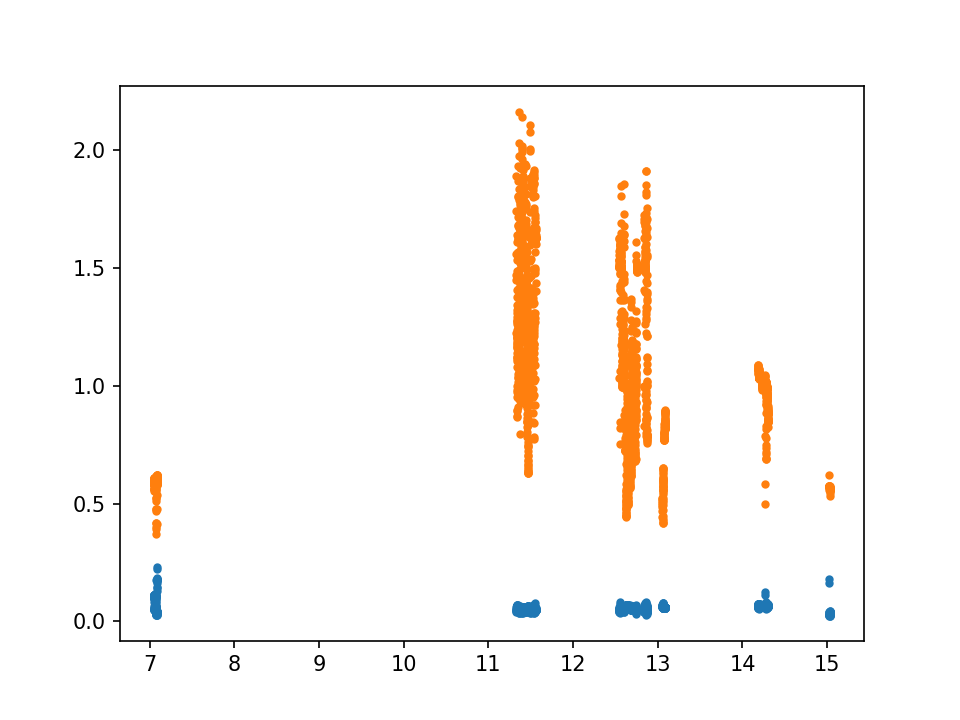

In [12]:
plt.figure()
plt.plot(ssfr_a[5]['Start_UTC'][ialt],ssfr_a[5]['UP500'][ialt]/ssfr_a[5]['DN500'][ialt],'.')
plt.plot(ssfr_a[5]['Start_UTC'][ialt],ssfr_a[5]['DN500'][ialt],'.')

In [15]:
iflt = (ssfr_a[5]['Start_UTC']>11.4692) & (ssfr_a[5]['Start_UTC']<11.5)

In [16]:
sk =  ssfr_a[5].keys()
sk.sort()
for k in sk:
    if 'DN' in k:
        print k, np.nanmean(ssfr_a[5][k.replace('DN','UP')][iflt])/np.nanmean(ssfr_a[5][k][iflt])

DN1020 0.03832971566467882
DN1064 0.03747397011097343
DN1250 0.03825701725510272
DN1650 0.03612566976243953
DN2100 0.0558477881891457
DN415 0.05893225757715411
DN440 0.05603024936635722
DN500 0.052316333099879965
DN675 0.03832594848135679
DN870 0.038052676050719984
DN990 0.03830264437281341


In [18]:
albedo_wvl = [415.0,440.0,500.0,675.0,870.0,990.0,1020.0,1064.0,1250.0,1650.0,2100.0]
albedos = [0.0589,0.0560,0.0523,0.0383,0.0381,0.0383,0.0383,0.0375,0.0383,0.0361,0.0558]

In [19]:
albedo_wvl,albedos

([415.0,
  440.0,
  500.0,
  675.0,
  870.0,
  990.0,
  1020.0,
  1064.0,
  1250.0,
  1650.0,
  2100.0],
 [0.0589,
  0.056,
  0.0523,
  0.0383,
  0.0381,
  0.0383,
  0.0383,
  0.0375,
  0.0383,
  0.0361,
  0.0558])

## Load the 4STAR files with flagacaod

In [20]:
star_a, star_ah = [],[]
for d in days:
    sf,sfh = lu.load_ict(fp+'aod_ict/v8/4STAR-AOD_P3_{}_R3.ict'.format(d),return_header=True)
    star_a.append(lu.recarray_to_dict(sf))
    star_ah.append(sfh)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650', 'flag_acaod')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD05

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'flag_acaod', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0700', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0355', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0700', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0355', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD05

In [21]:
ssfr_a[3]['Start_UTC'][100]

7.578055555555555

In [19]:
star_ah[4]

['95, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2016\n',
 '1, 1\n',
 '2016, 09, 06, 2018, 06, 22\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20160824\n',
 '58\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 ' -9999.0000000, -9999.0000000, -9999.0, -9999, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.00

## Get the flagacaod on the timescale of the ssfr measurements

In [22]:
for i,d in enumerate(days):
    fa = nearest_neighbor(star_a[i]['Start_UTC'],star_a[i]['flag_acaod'],ssfr_a[i]['Start_UTC'],dist=3.0/3600.0)
    ssfr_a[i]['flagacaod'] = fa
    am = nearest_neighbor(star_a[i]['Start_UTC'],star_a[i]['amass_aer'],ssfr_a[i]['Start_UTC'],dist=3.0/3600.0)
    ssfr_a[i]['airmass'] = am
    ssfr_a[i]['sza'] = np.arccos(1.0/am)*180.0/np.pi
    aod = nearest_neighbor(star_a[i]['Start_UTC'],star_a[i]['AOD0501'],ssfr_a[i]['Start_UTC'],dist=3.0/3600.0)
    ssfr_a[i]['AOD_500'] = aod
    aod5 = nearest_neighbor(star_a[i]['Start_UTC'],star_a[i]['AOD0550'],ssfr_a[i]['Start_UTC'],dist=3.0/3600.0)
    ssfr_a[i]['AOD_550'] = aod5
    a2 = nearest_neighbor(star_a[i]['Start_UTC'],star_a[i]['AOD_polycoef_a2'],ssfr_a[i]['Start_UTC'],dist=3.0/3600.0)
    ssfr_a[i]['a2'] = a2
    a1 = nearest_neighbor(star_a[i]['Start_UTC'],star_a[i]['AOD_polycoef_a1'],ssfr_a[i]['Start_UTC'],dist=3.0/3600.0)
    ssfr_a[i]['a1'] = a1
    a0 = nearest_neighbor(star_a[i]['Start_UTC'],star_a[i]['AOD_polycoef_a0'],ssfr_a[i]['Start_UTC'],dist=3.0/3600.0)
    ssfr_a[i]['a0'] = a0

In [23]:
ssfr_a[0]['flagacaod'].shape,ssfr_a[0]['Start_UTC'].shape

((4929,), (4929,))

## Load the LUT for 2wvl reflectance retrieval

In [24]:
lut = hs.loadmat(fp+'rtm/v6_irr_ORACLES_lut.mat')

In [25]:
lut.keys()

[u'tau',
 u'rad',
 u'lut_details',
 u'sza',
 u'irr_dn_diff',
 u'irr_dn',
 u'zout',
 u'wvl',
 u'phase',
 u'ref',
 u'irr_up']

## Combine into one array

In [26]:
nm = ssfr_a[1].keys()

In [27]:
ar = {}
for n in ssfr_a[1].keys():
    ar[n] = np.array([])

In [28]:
ar['days'] = np.array([])
ar['doy'] = np.array([])

In [29]:
for i,d in enumerate(days):
    ar['days'] = np.append(ar['days'],np.zeros_like(ssfr_a[i]['Start_UTC'])+i)
    
    ar['doy'] = np.append(ar['doy'],np.zeros_like(ssfr_a[i]['Start_UTC'])+datetime(int(d[0:4]),int(d[4:6]),int(d[6:8])).timetuple().tm_yday)
    for n in nm:
        try:
            ar[n] = np.append(ar[n],ssfr_a[i][n])
        except:
            print 'problem with :'+n
            ar[n] = np.append(ar[n],ssfr_a[i]['Start_UTC']*0)

In [30]:
ar['days'].shape

(380923,)

In [31]:
nm

['UP1250',
 'DN415',
 'sza',
 'UP1020',
 'UP870',
 'AOD_500',
 'DN1650',
 'DN2100',
 'UP990',
 'flagacaod',
 'UP1064',
 'DN675',
 'AOD_550',
 'UP415',
 'HEAD',
 'airmass',
 'LON',
 'UP2100',
 'ROLL',
 'DN500',
 'a1',
 'DN1020',
 'DN870',
 'DN440',
 'UP675',
 'DN1250',
 'a0',
 'UP440',
 'DN1064',
 'Start_UTC',
 'UP1650',
 'a2',
 'PITCH',
 'LAT',
 'DN990',
 'ALT',
 'UP500']

# Format the LUT and data for retrievals

In [32]:
class so:
    pass

## Set up the data

In [33]:
ar['meas'] = so
ar['meas'].sza = ar['sza']
ar['meas'].Rvis = ar['UP500']/ar['DN500']
ar['meas'].Rnir = ar['UP2100']/ar['DN2100']
ar['meas'].utc = ar['Start_UTC']

In [34]:
# filter out the bad data. 
bad = (ar['meas'].Rvis > 1.0) & (ar['flagacaod']==0) & (ar['meas'].Rnir > 1.0)
ar['meas'].Rvis[bad] = np.nan
ar['meas'].Rvis[bad] = np.nan

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [35]:
igood = np.where((np.isfinite(ar['meas'].Rvis)) & (ar['meas'].Rvis > 0.0) & (np.isfinite(ar['meas'].Rnir)) & \
(ar['meas'].Rnir > 0.0) & (ar['flagacaod']==1))[0]

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


## Plot the histogram of cloud reflectances

<IPython.core.display.Javascript object>


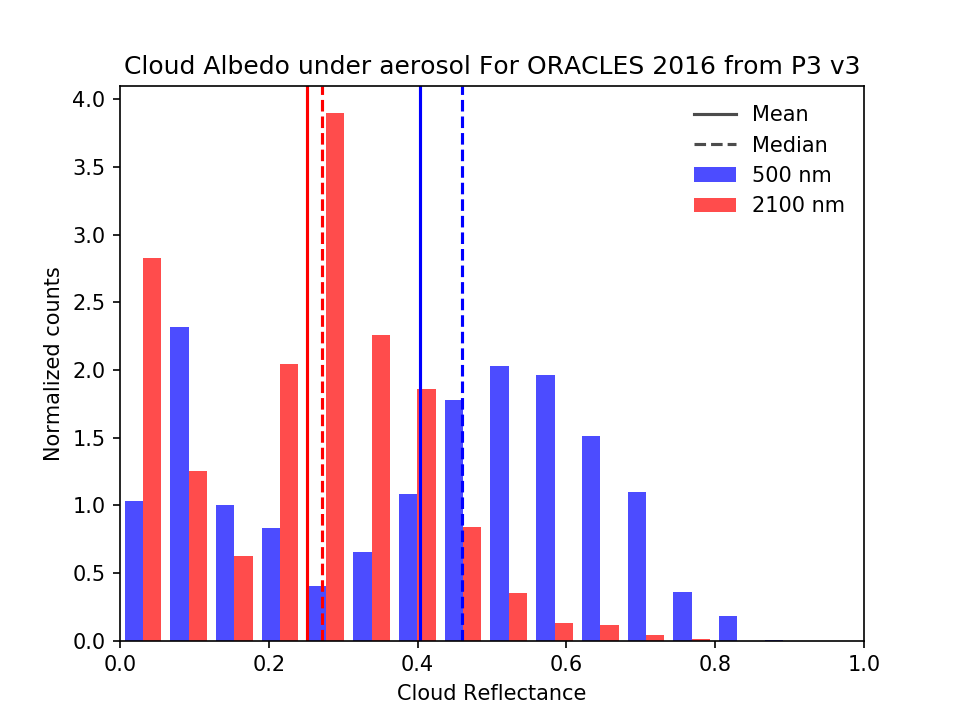

In [38]:
plt.figure()

plt.hist([ar['meas'].Rvis[igood],ar['meas'].Rnir[igood]],bins=30,edgecolor='None',color=['b','r'],alpha=0.7,normed=True,label=['500 nm','2100 nm'])

plt.ylabel('Normalized counts')
plt.xlabel('Cloud Reflectance')
plt.title('Cloud Albedo under aerosol For ORACLES 2016 from P3 {}'.format(vv))
plt.xlim([0,1])


plt.axvline(np.nanmean(ar['meas'].Rvis[igood]),color='b')
plt.axvline(np.nanmedian(ar['meas'].Rvis[igood]),color='b',linestyle='--')
plt.axvline(np.nanmean(ar['meas'].Rnir[igood]),color='r')
plt.axvline(np.nanmedian(ar['meas'].Rnir[igood]),color='r',linestyle='--')

plt.axvline(-0.1,color='k',alpha=0.7,label='Mean')
plt.axvline(-0.1,color='k',alpha=0.7,linestyle='--',label='Median')

plt.legend(frameon=False)

plt.savefig(fp+'plot/Cloud_reflectance_ORACLES_2016_{}.png'.format(vv),dpi=600,transparent=True)

In [40]:
plt.figure()
plt.hist2d(ar['meas'].Rvis[igood],ar['meas'].sza[igood],bins=40,range=[[0,1],[0,90]])
plt.ylabel('SZA')
plt.xlabel('Cloud reflectance at 500 nm')
plt.title('Reflectances directly above cloud - {}'.format(vv))
cb = plt.colorbar()
cb.set_label('Counts')
plt.savefig(fp+'plot/ORACLES_2016_2dhist_SZA_vs_cloud_refl500_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


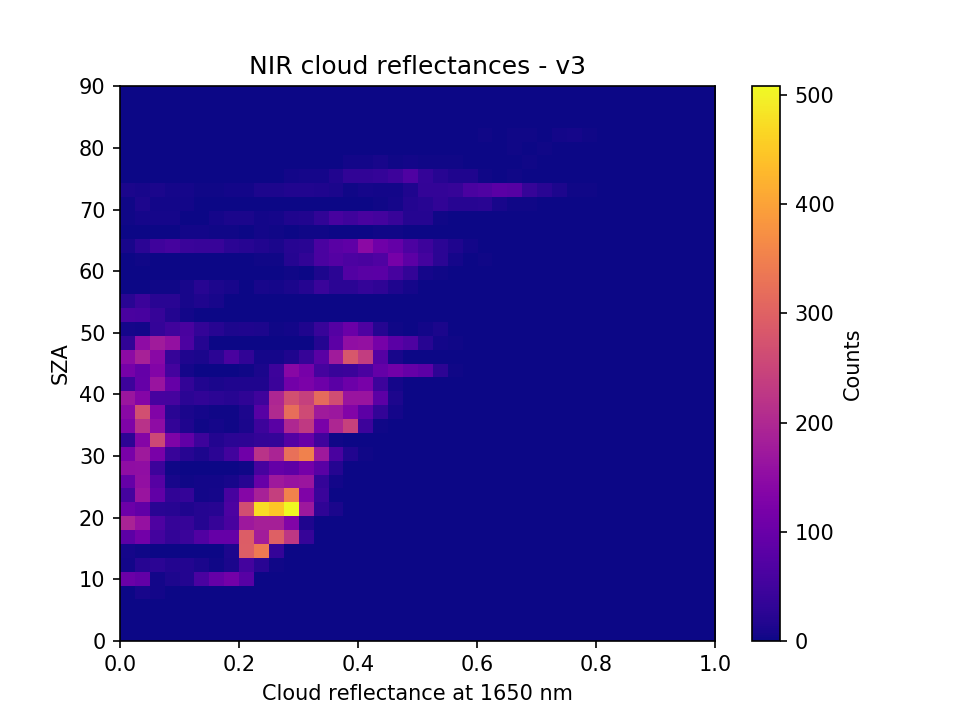

In [42]:
plt.figure()
plt.hist2d(ar['meas'].Rnir[igood],ar['meas'].sza[igood],bins=40,range=[[0,1],[0,90]],cmap=plt.cm.plasma)
plt.ylabel('SZA')
plt.xlabel('Cloud reflectance at 1650 nm')
plt.title('NIR cloud reflectances - {}'.format(vv))
cb = plt.colorbar()
cb.set_label('Counts')
plt.savefig(fp+'plot/ORACLES_2016_2dhist_SZA_vs_cloud_refl1650_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


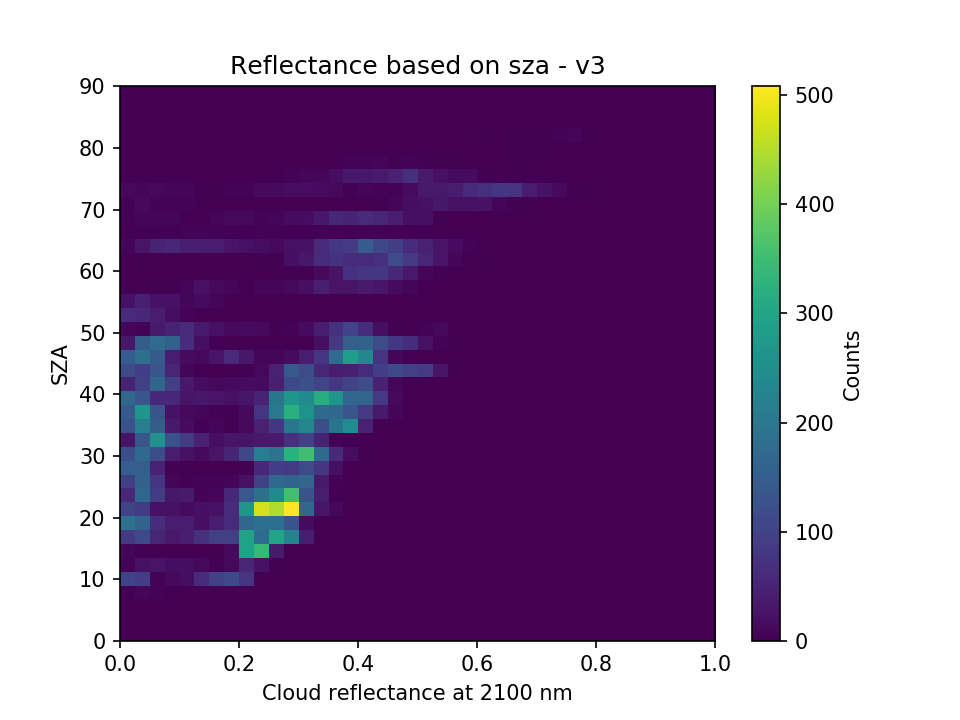

In [43]:
plt.figure()
plt.hist2d(ar['meas'].Rnir[igood],ar['meas'].sza[igood],bins=40,range=[[0,1],[0,90]])
plt.ylabel('SZA')
plt.xlabel('Cloud reflectance at 2100 nm')
plt.title('Reflectance based on sza - {}'.format(vv))
cb = plt.colorbar()
cb.set_label('Counts')
plt.savefig(fp+'plot/ORACLES_2016_2dhist_SZA_vs_cloud_refl2100_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


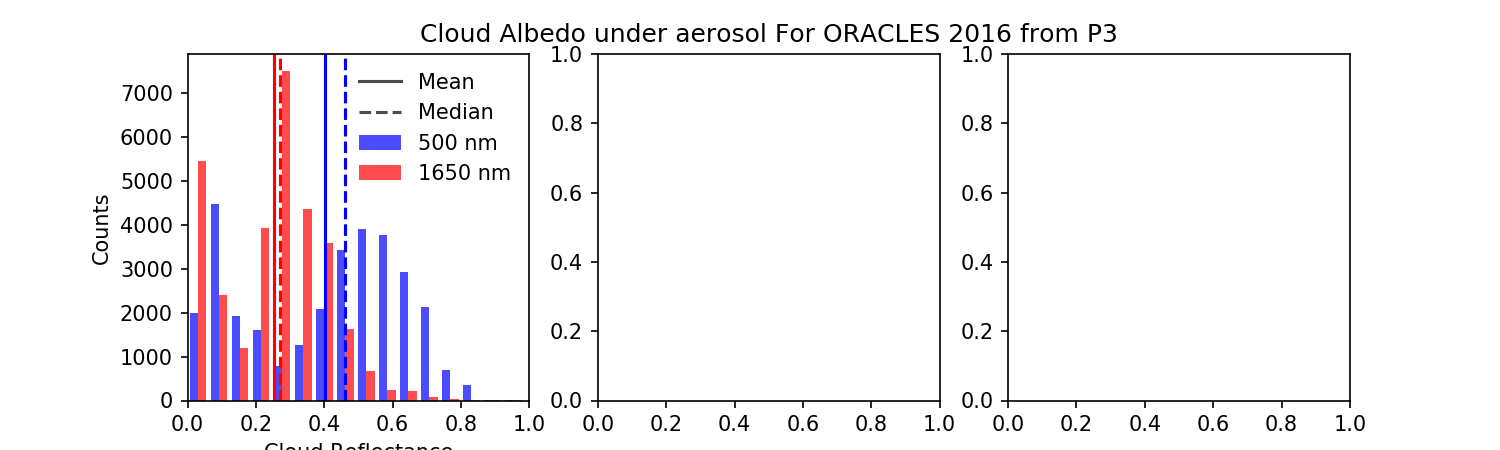

Text(0.5,1,'Cloud Albedo under aerosol For ORACLES 2016 from P3')

In [44]:
[fig, ax] = plt.subplots(1,3,figsize=(10,3))
ax[0].hist([ar['meas'].Rvis[igood],ar['meas'].Rnir[igood]],bins=30,edgecolor='None',color=['b','r'],
           alpha=0.7,label=['500 nm','1650 nm'])
ax[0].set_xlim(0,1)
ax[0].set_xlabel('Cloud Reflectance')
ax[0].set_ylabel('Counts')
ax[0].axvline(np.nanmean(ar['meas'].Rvis[igood]),color='b')
ax[0].axvline(np.nanmedian(ar['meas'].Rvis[igood]),color='b',linestyle='--')
ax[0].axvline(np.nanmean(ar['meas'].Rnir[igood]),color='r')
ax[0].axvline(np.nanmedian(ar['meas'].Rnir[igood]),color='r',linestyle='--')

ax[0].axvline(-0.1,color='k',alpha=0.7,label='Mean')
ax[0].axvline(-0.1,color='k',alpha=0.7,linestyle='--',label='Median')
ax[0].legend(frameon=False)

ax[1].set_title('Cloud Albedo under aerosol For ORACLES 2016 from P3')

In [45]:
plt.figure()
plt.hist2d(ar['meas'].Rvis[igood],ar['AOD_500'][igood],bins=40,range=[[0,1],[0,0.8]],cmap=plt.cm.viridis)
plt.ylabel('AOD$_{{500}}$')
plt.xlabel('Cloud reflectance at 500 nm')
plt.title('Cloud reflectance and AOD {}'.format(vv))
cb = plt.colorbar()
cb.set_label('Counts')
plt.savefig(fp+'plot/ORACLES_2016_AOD_vs_reflectance500nm_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>

## Get the DARE parameterization

In [36]:
fp

u'/data/sam/ORACLES/'

In [50]:
## Old do not use

sares = []
for i in xrange(9):
    sares.append(sio.idl.readsav(fp+'data_other/ssfr/AOD_DARE_param_coeffs_{}0sza_for_sam_v2.out'.format(i)))  
sares_sza = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0]

In [37]:
 ## Update from table 4a and 4b on Cochrane et al. 2020 manuscript submitted for publication:
sares = []
sares_sza = [0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0]

In [43]:
l0 = [-135.2,-136.1,-138.5,-142.5,-147.9,-153.9,-158.0,-152.6,-116.0]
l0e = [17.1,17.1,16.9,16.6,16.1,15.2,13.7,11.6,8.6]
l1 = [751.1,743.3,720.2,682.4,630.5,564.5,482.5,378.5,239.4]
l1e = [57.3,56.6,54.6,51.2,46.5,40.5,33.3,25.5,18.2]
l2 = [-168.1,-164.8, -154.9,-138.8, -117.0, -90.4, -60.7, -32.7, -24.1]
l2e = [26.1,25.7,24.4,22.4,19.6,16.2,12.1,7.6,3.4]
q0 = [31.6,32.36,34.6,38.7,45.1,54.7,67.5,80.3,77.4]
q0e = [6.1,6.1,6.2,6.4,6.5,6.5,6.2,6.7,5.6]
q1 = [-269.8,-268.1,-263.3,-255.7,-246.1,-235.1,-221.6,-200.5,-156.8]
q1e = [31.9,31.6,30.9,29.5,27.6,24.9,21.2,16.8,13.1]
q2 = [126.7,124.6,118.4,108.0,93.5,74.7,51.9,27.1,15.5]
q2e = [17.2,16.9,16.2,14.9,13.2,11.1,8.6,5.7,2.5]

In [44]:
c1 = [-652.0,-657.0,-665.3,-682.0,-703.2,-725.6,-733.1,-692.5,-524.3]
c2 = [113.5,120.9,129.0,151.2,185.6,235.7,295.9,353.7,353.2]
d1 = [-2741.3,-2112.1,-2625.2,-2482.3,-2284.9,-2032.9,-1721.7,-1335.1,-817.6]
d2 = [1210.9,1201.6,1174.6,1131.2,1072.8,999.9,909.4,787.5,577.3]

In [50]:
sares = []
for i,z in enumerate(sares_sza):
    sares.append({'avl0':l0[i],'avl1':l1[i],'avl2':l2[i],'avq0':q0[i],'avq1':q1[i],'avq2':q2[i],
                'erl0':l0e[i],'erl1':l1e[i],'erl2':l2e[i],'erq0':q0e[i],'erq1':q1e[i],'erq2':q2e[i],
                'c1':c1[i],'c2':c2[i],'d1':d1[i],'d2':d2[i]})

In [51]:
sares[-2]

{'asy': array([0.55967164, 0.5490279 , 0.5490279 , 0.5490279 , 0.52937967,
        0.56908715, 0.5302168 , 0.5425615 , 0.42266756], dtype=float32),
 'avl0': -152.5893,
 'avl1': 378.46985,
 'avl2': -32.744156,
 'avq0': 80.30742,
 'avq1': -200.51259,
 'avq2': 27.060648,
 'dates': array(['v2', 'v2', 'v2', 'v2', 'v2', 'v2', 'v2', 'v2', 'v2'], dtype=object),
 'l00': array([-148.99442, -139.48524, -166.8115 , -156.97229, -158.21056,
        -144.243  , -163.93878, -133.36975, -161.27818], dtype=float32),
 'l11': array([353.4017 , 402.59604, 344.44736, 399.46207, 364.5937 , 350.03134,
        401.54703, 407.13132, 383.01837], dtype=float32),
 'l22': array([-29.413902, -28.929   , -43.722492, -32.720924, -33.38815 ,
        -26.969082, -40.396446, -19.559784, -39.597584], dtype=float32),
 'q00': array([75.629486, 79.35755 , 85.82368 , 82.31618 , 82.58771 , 72.99252 ,
        84.22094 , 71.97725 , 87.86149 ], dtype=float32),
 'q11': array([-182.39851, -215.7021 , -177.85567, -212.59608, -191.80

**Old**

From Sabrina Cochrane on 2019-06-27, 2:23pm

Here they are! The variables are l0, l1, l2, q0, q1, q2, crit_alb. Note this is valid for a SZA of 20 and for one retrieval from 20160920 (let me know if you need the ssa/g values.)

In case you need it, here is how I calculated SARE:

         l_term=l0+l1*(albedo550-critical_albedo)+l2*(albedo55-critical_albedo)^2
         q_term=q0+q1*(albedo550-critical_albedo)+q2*albedo-critical_albedo)^2
         sare=l_term*aod550+q_term*[aod550]^2

Let me know if you have questions or need any more info,
Sabrina

Cases for 9, spanning 2016 and 2017. related ssa, and g. Each case for 0-80 SZA. Range of calculated AOD, tied 550
Parameterization, for 0-80 sza, there is an aaod parameterisation. 

**New**

From Sabrina Cochrane on Aug 14, 2019, 2:50 pm 

Hi Sam,

Thanks for chatting with me today. Here are the files with the coefficients for the 9 cases along with the average coefficients from all cases. Each SZA has its own file and is labeled in the filename. The variables in the file are:

dates: array with the dates in order 

spnums: spiral numbers in order (the specific numbers aren't that important, just a way to keep track for days that have more than one spiral)

sza: same as in the file name

l00,l11,l22,q00,q11,q22: arrays for each of the coefficients in the same order as the dates. So for date and spnum index 0, you'll use l00[0], l11[0], l22[0], q00[0], q11[0], q22[0]. To calculate BB DARE (i.e. SARE), you would do:

    l_term=l00+l11*(albedo550)+l22*(albedo550)^2
    q_term=q00+q11*(albedo550)+q22*albedo)^2
    sare=l_term*aod550+q_term*[aod550]^2

*this is slightly different than what I gave you last time- we've removed the critical albedo since it wasn't necessary here. It will be included in the AAOD parameterization.

avl0,avl1,avl2,avq0,avq1,avq2: Average coefficients for all cases in same order as dates. 

svl0,svl1,svl2,svq0,svq1,svq2: standard deviation of the average calculation


Let me know if you have any questions!

In [52]:
for sa in sares:
    sa['doy'] = np.array([datetime(int(d[0:4]),int(d[4:6]),int(d[6:8])).timetuple().tm_yday for d in sa['spnums']])

In [53]:
sares[6]['avl1']

482.49115

In [54]:
sare['sza'] = [20.0]

NameError: name 'sare' is not defined

In [53]:
def P_dare_fx(aod_550,albedo_550,sza,sares=sares,sares_sza=sares_sza):
    'Function from manuscript, to calculate the DARE (P(AOD550,ssa550)) eq. 12, Cochrane, 2020, AMT - no doy specific'
    
    dare = np.zeros_like(sza)+np.nan
    szai = []
    for j,z in enumerate(sza):
        i = np.argmin(abs(z-sares_sza))
        szai.append(i)
        
        l_term = sares[i]['avl0']+sares[i]['avl1']*albedo_550[j]+sares[i]['avl2']*(albedo_550[j])**2.0
        q_term = sares[i]['avq0']+sares[i]['avq1']*albedo_550[j]+sares[i]['avq2']*(albedo_550[j])**2.0
        dare[j] = l_term*aod_550[j] + q_term*(aod_550[j])**2.0    
    
    return dare,np.array(szai)

In [54]:
def PX_dare_fx(aod_550,albedo_550,ssa_550,sza,sares=sares,sares_sza=sares_sza):
    'Function from manuscript, to calculate the DARE (P(AOD550,ssa550)) eq. 12, Cochrane, 2020, AMT - no doy specific'
    
    ssa_mean = 0.83
    dare = np.zeros_like(sza)+np.nan
    szai = []
    for j,z in enumerate(sza):
        i = np.argmin(abs(z-sares_sza))
        szai.append(i)
        crit_alb = 0.21+(ssa_550[j]-ssa_mean)        
        l_term = sares[i]['avl0']+sares[i]['avl1']*albedo_550[j]+sares[i]['avl2']*(albedo_550[j])**2.0
        q_term = sares[i]['avq0']+sares[i]['avq1']*albedo_550[j]+sares[i]['avq2']*(albedo_550[j])**2.0
        c_term = sares[i]['c1']*aod_550[j]+sares[i]['c2']*aod_550[j]**2.0
        d_term = sares[i]['d1']*aod_550[j]+sares[i]['d2']*aod_550[j]**2.0
        delta_crit = c_term*(ssa_550[j]-ssa_mean)
        delta_max = d_term*(ssa_550[j]-ssa_mean)
          
        if albedo_550[j] < crit_alb: 
            delta = delta_crit
        else:
            delta = (albedo_550[j]-crit_alb)/(1.0-crit_alb) * delta_max + (1.0-albedo_550[j])/(1.0-crit_alb)*delta_crit
        dare[j] = l_term*aod_550[j] + q_term*(aod_550[j])**2.0 + delta
    return dare,np.array(szai)

In [55]:
# Old pre manuscript

def sare_fx(alb,aod,sares,sza,doy,sares_sza=np.array(sares_sza)):
    'Function to calculate the Scalable Aerosol Radiative Effect (SARE) from Cochrane et al., 2019 in prep v2'
    
    dare = np.zeros_like(sza)+np.nan
    szai = []
    for j,z in enumerate(sza):
        i = np.argmin(abs(z-sares_sza))
        k = np.argmin(abs(doy[j]-sares[i]['doy']))
        
        szai.append(i)
        #l_term = sares[i]['l0']+sares[i]['l1']*(alb-sares[i]['crit_alb'])+sares[i]['l2']*(alb-sares[i]['crit_alb'])**2.0
        #q_term = sares[i]['q0']+sares[i]['q1']*(alb-sares[i]['crit_alb'])+sares[i]['q2']*(alb-sares[i]['crit_alb'])**2.0

        l_term = sares[i]['l00'][k]+sares[i]['l11'][k]*alb[j]+sares[i]['l22'][k]*alb[j]**2.0
        q_term = sares[i]['q00'][k]+sares[i]['q11'][k]*alb[j]+sares[i]['q22'][k]*alb[j]**2.0
        dare[j] = l_term*aod[j] + q_term*(aod[j])**2.0
        
    return dare,np.array(szai)

In [55]:
dare,szai = sare_fx(ar['meas'].Rvis[igood],ar['AOD_550'][igood],sares,ar['meas'].sza[igood],ar['doy'][igood])

NameError: name 'sare_fx' is not defined

In [78]:
s = hs.loadmat(fp+'ORACLES_DARE_{}.mat'.format('v3'))
s['doys'] = s['doy']+s['utc']/24.0
ar['doys'] = ar['doy']+ar['Start_UTC']/24.0
s_ssa_fx = interpolate.interp1d(s['doys'],s['ssa'][:,2],kind='linear',fill_value="extrapolate")
ar['ssa'] = s_ssa_fx(ar['doys'])

In [56]:
dare_p,szai = P_dare_fx(ar['AOD_550'][igood],ar['meas'].Rvis[igood],ar['meas'].sza[igood])

In [79]:
dare_px,szaix = PX_dare_fx(ar['AOD_550'][igood],ar['meas'].Rvis[igood],ar['ssa'][igood],ar['meas'].sza[igood])

In [57]:
np.nanmin(dare),np.nanmax(dare),np.nanmean(dare),np.nanmedian(dare)

(-59.181924808572276,
 168.86826029104742,
 27.658564806947467,
 26.788683351178832)

In [80]:
np.nanmin(dare_p),np.nanmax(dare_p),np.nanmean(dare_p),np.nanmedian(dare_p)

(-58.659259890257516,
 157.74052075538353,
 22.846770610558178,
 24.290794700209258)

In [81]:
np.nanmin(dare_px),np.nanmax(dare_px),np.nanmean(dare_px),np.nanmedian(dare_px)

(-68.7072229725575, 153.35563937320174, 25.574315643060277, 30.078601169935798)

<IPython.core.display.Javascript object>


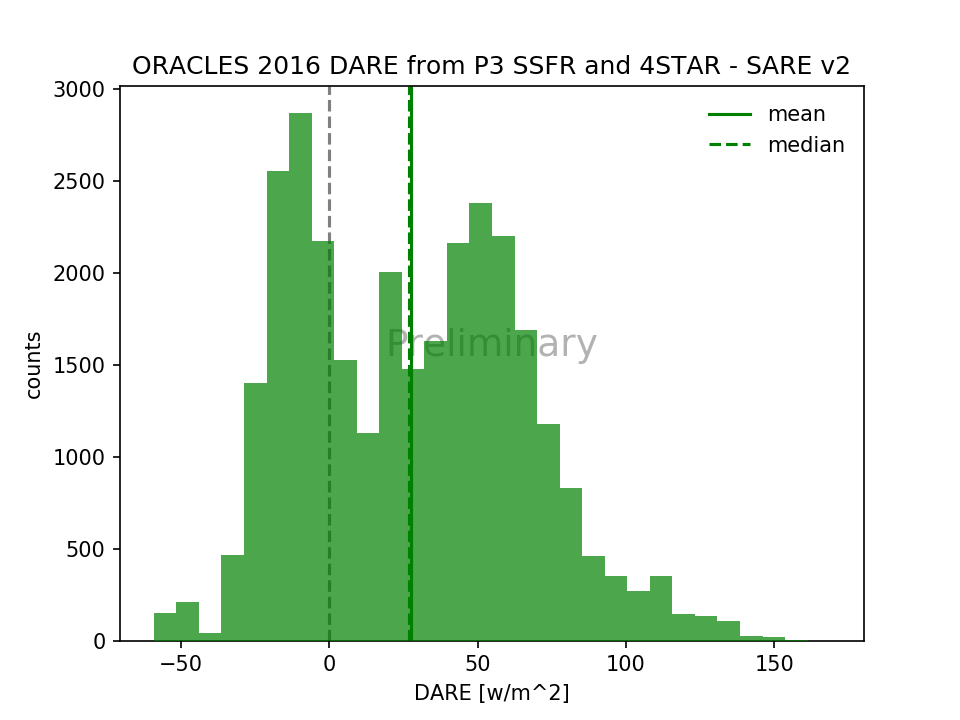

/home/sam/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/sam/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [58]:
plt.figure()
plt.hist(dare,bins=30,edgecolor='None',alpha=0.7,color='g',range=(np.nanmin(dare),np.nanmax(dare)),zorder=10)
plt.xlabel('DARE [w/m^2]')
plt.ylabel('counts')
plt.title('ORACLES 2016 DARE from P3 SSFR and 4STAR - SARE v2')

plt.axvline(0,color='k',alpha=0.5,linestyle='--',zorder = -10)
plt.axvline(np.nanmean(dare),color='g',label='mean')
plt.axvline(np.nanmedian(dare),color='g',linestyle='--',label='median')
plt.legend(frameon=False)
pu.prelim()
plt.savefig(fp+'plot/ORACLES_2016_DARE_from_param_hist_v2.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


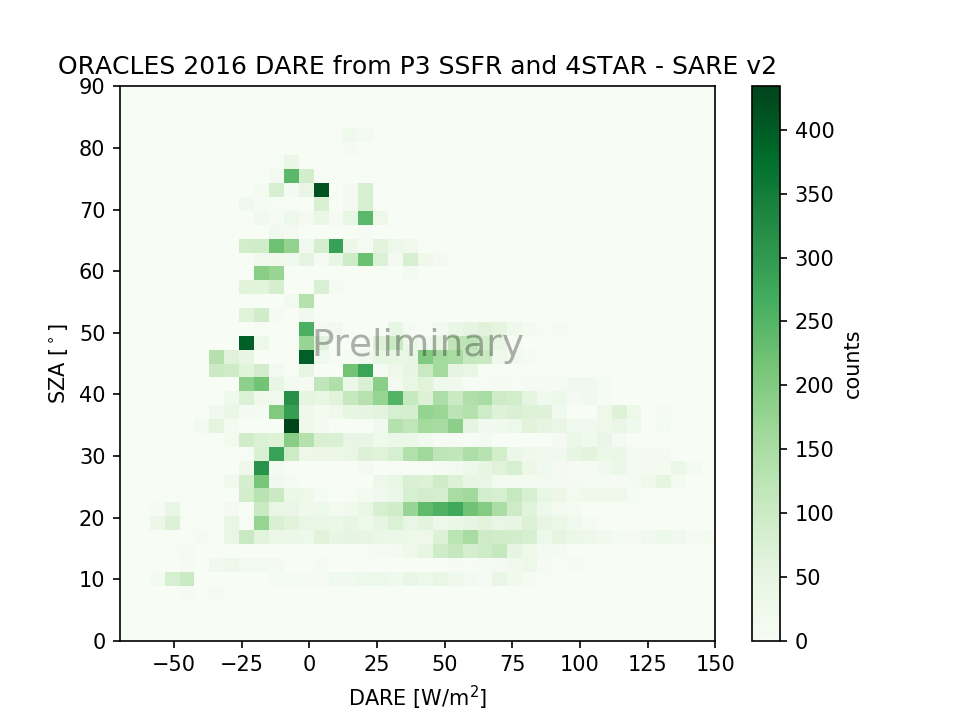

In [60]:
plt.figure()
plt.hist2d(dare,ar['meas'].sza[igood],bins=40,range=[[-70,150],[0,90]],cmap=plt.cm.Greens)
plt.ylabel('SZA [$^\\circ$]')
plt.xlabel('DARE [W/m$^2$]')
plt.title('ORACLES 2016 DARE from P3 SSFR and 4STAR - SARE v2')

cb = plt.colorbar()
cb.set_label('counts')
pu.prelim()

plt.savefig(fp+'plot/ORACLES_2016_DARE_from_param_vs_SZA_v2.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


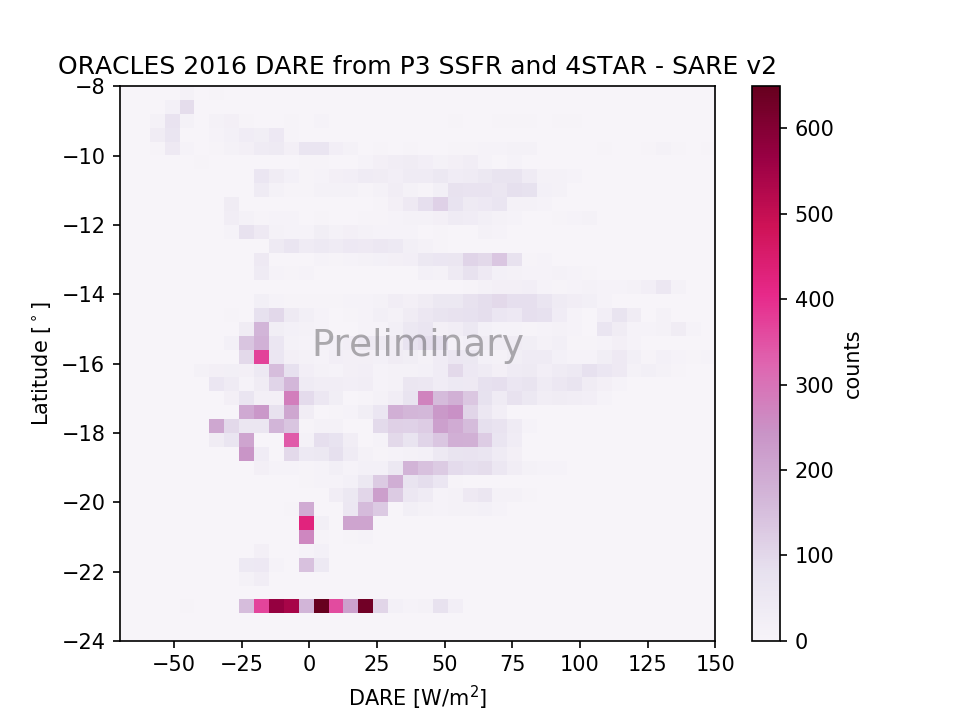

In [61]:
plt.figure()
plt.hist2d(dare,ar['LAT'][igood],bins=40,range=[[-70,150],[-24,-8]],cmap=plt.cm.PuRd)
plt.ylabel('Latitude [$^\\circ$]')
plt.xlabel('DARE [W/m$^2$]')
plt.title('ORACLES 2016 DARE from P3 SSFR and 4STAR - SARE v2')

cb = plt.colorbar()
cb.set_label('counts')
pu.prelim()

plt.savefig(fp+'plot/ORACLES_2016_DARE_from_param_vs_lat_v2.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


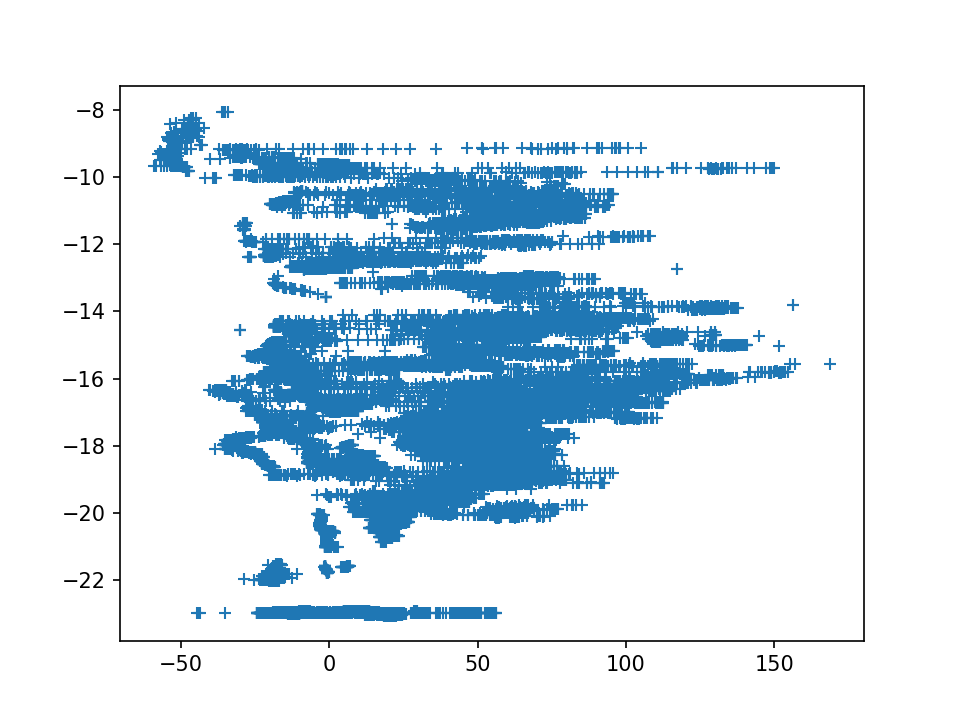

In [62]:
plt.figure()
plt.plot(dare,ar['LAT'][igood],'+')

In [63]:
plt.figure()
sca = plt.scatter(ar['LON'][igood],ar['LAT'][igood],c=dare,edgecolor='None',s=40,alpha=0.5,cmap=plt.cm.viridis)
plt.grid()
plt.xlim(-1,16)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('Latitude [$^\\circ$]')
cb = plt.colorbar(sca)
cb.set_label('DARE [W/m$^2$]')
pu.prelim()

<IPython.core.display.Javascript object>

### Add the model-obs comparison boxes

The observations and model data are aggregated within horizontal domains of at least 2o by 2o indicated in Fig. 2. One of the three main regions encompasses the routine flight track, with individual grid boxes centered at (14oE, 24oS), (12oE, 22oS), (10oE, 20oS), (8oE, 18oS), (6oE, 16oS), (4oE, 14oS), (2oE, 12oS) and (0oE, 10oS). Another more coastal north-south track has the southernmost grid box centered on 22oS, spanning between 9oE and 11.75oE. Seven grid boxes are located every 2 degrees north of this, with the northernmost grid box centered on 8oS. A third, zonal track covers the larger domain of the ER2 measurements, with individual grid boxes spanning latitudinally between 10oS and 6oS and separated longitudinally at two degree intervals beginning at 3oW to the west and 13oE in the east. The box for St. Helena Island spans between 6.72 oW and 4.72 oW, between 16.933 oS and 14.933 oS.

In [64]:
boxes_diag = []
boxes_ns = []
boxes_ew = []

In [65]:
boxes_diag_ct = [[14.0,-24.0], [12.0,-22.0],[10.0,-20.0],[8.0,-18.0],[6.0,-16.0],[4.0,-14.0],[2.0,-12.0],[0.0,-10.0]]
boxes_ns_ct = [[10.5,-22.0],[10.5,-20.0],[10.5,-18.0],[10.5,-16.0],[10.5,-14.0],[10.5,-12.0],[10.5,-10.0],[10.5,-8.0]]
boxes_ew_ct = [[-3.0,-8.0],[-1.0,-8.0],[1.0,-8.0],[3.0,-8.0],[5.0,-8.0],[7.0,-8.0],[9.0,-8.0],[11.0,-8.0],[13.0,-8.0]]

Corners are [x0,x1,y0,y1]

In [66]:
boxes_ns = [[9.0,11.75,i[1]-1.0,i[1]+1.0] for i in boxes_ns_ct]

In [67]:
boxes_ew = [[-10.0,-6.0,i[0]-1.0,i[0]+1.0] for i in boxes_ew_ct]

In [68]:
boxes_diag = [[i[0]-1.0,i[0]+1,i[1]-1.0,i[1]+1.0] for i in boxes_diag_ct]

In [69]:
boxes_diag

[[13.0, 15.0, -25.0, -23.0],
 [11.0, 13.0, -23.0, -21.0],
 [9.0, 11.0, -21.0, -19.0],
 [7.0, 9.0, -19.0, -17.0],
 [5.0, 7.0, -17.0, -15.0],
 [3.0, 5.0, -15.0, -13.0],
 [1.0, 3.0, -13.0, -11.0],
 [-1.0, 1.0, -11.0, -9.0]]

In [70]:
boxes_ew

[[-10.0, -6.0, -4.0, -2.0],
 [-10.0, -6.0, -2.0, 0.0],
 [-10.0, -6.0, 0.0, 2.0],
 [-10.0, -6.0, 2.0, 4.0],
 [-10.0, -6.0, 4.0, 6.0],
 [-10.0, -6.0, 6.0, 8.0],
 [-10.0, -6.0, 8.0, 10.0],
 [-10.0, -6.0, 10.0, 12.0],
 [-10.0, -6.0, 12.0, 14.0]]

In [71]:
boxes_ns

[[9.0, 11.75, -23.0, -21.0],
 [9.0, 11.75, -21.0, -19.0],
 [9.0, 11.75, -19.0, -17.0],
 [9.0, 11.75, -17.0, -15.0],
 [9.0, 11.75, -15.0, -13.0],
 [9.0, 11.75, -13.0, -11.0],
 [9.0, 11.75, -11.0, -9.0],
 [9.0, 11.75, -9.0, -7.0]]

In [72]:
bins_diag = []
bins_diag_alb = []
for i,b in enumerate(boxes_diag):
    ia = (ar['LON'][igood]>= b[0]) & (ar['LON'][igood]<=b[1]) &(ar['LAT'][igood]>=b[2]) & (ar['LAT'][igood]<=b[3]) & (np.isfinite(dare))
    bins_diag.append(dare[ia])
    bins_diag_alb.append(ar['meas'].Rnir[igood][ia])
    

In [73]:
bins_ns = []
for i,b in enumerate(boxes_ns):
    ia = (ar['LON'][igood]>= b[0]) & (ar['LON'][igood]<=b[1]) &(ar['LAT'][igood]>=b[2]) & (ar['LAT'][igood]<=b[3]) & (np.isfinite(dare))
    bins_ns.append(dare[ia])

In [74]:
bins_ew = []
for i,b in enumerate(boxes_ew):
    ia = (ar['LON'][igood]>= b[0]) & (ar['LON'][igood]<=b[1]) &(ar['LAT'][igood]>=b[2]) & (ar['LAT'][igood]<=b[3]) & (np.isfinite(dare))
    bins_ew.append(dare[ia])

In [75]:
len(boxes_diag),len(bins_diag)

(8, 8)

In [76]:
[fig,ax] = plt.subplots(1,8,figsize=(13,3))

for i,b in enumerate(boxes_diag_ct):
    ax[i].hist(bins_diag[i],bins=30,edgecolor='None',alpha=0.7,color='g',range=(-60,150),zorder=10,normed=True,orientation='horizontal')
    ax[i].axhline(np.nanmean(bins_diag[i]),color='g',label='mean')
    ax[i].axhline(np.nanmedian(bins_diag[i]),color='g',linestyle='--',label='median')
    xmin, xmax = ax[i].get_xlim()
    ax[i].set_xticks(np.round(np.linspace(xmin, xmax, 3), 2))
    ax[i].axhline(0,ls=':',color='k',alpha=0.2)
    if i>0:
        [ag.set_visible(False) for ag in ax[i].yaxis.get_ticklabels()]
    ax[i].set_title('{}$^\\circ$ ,{}$^\\circ$'.format(b[0],b[1]))
    if i%2: pu.prelim(ax[i])
ax[0].set_ylabel('DARE [W/m$^2$]')
fig.suptitle('ORACLES 2016 Routine Diagonal (Lon,Lat) - 4STAR+SSFR SARE params v2')
fig.tight_layout()
plt.savefig(fp+'plot/ORACLES_2016_DARE_v2_diag_boxes.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


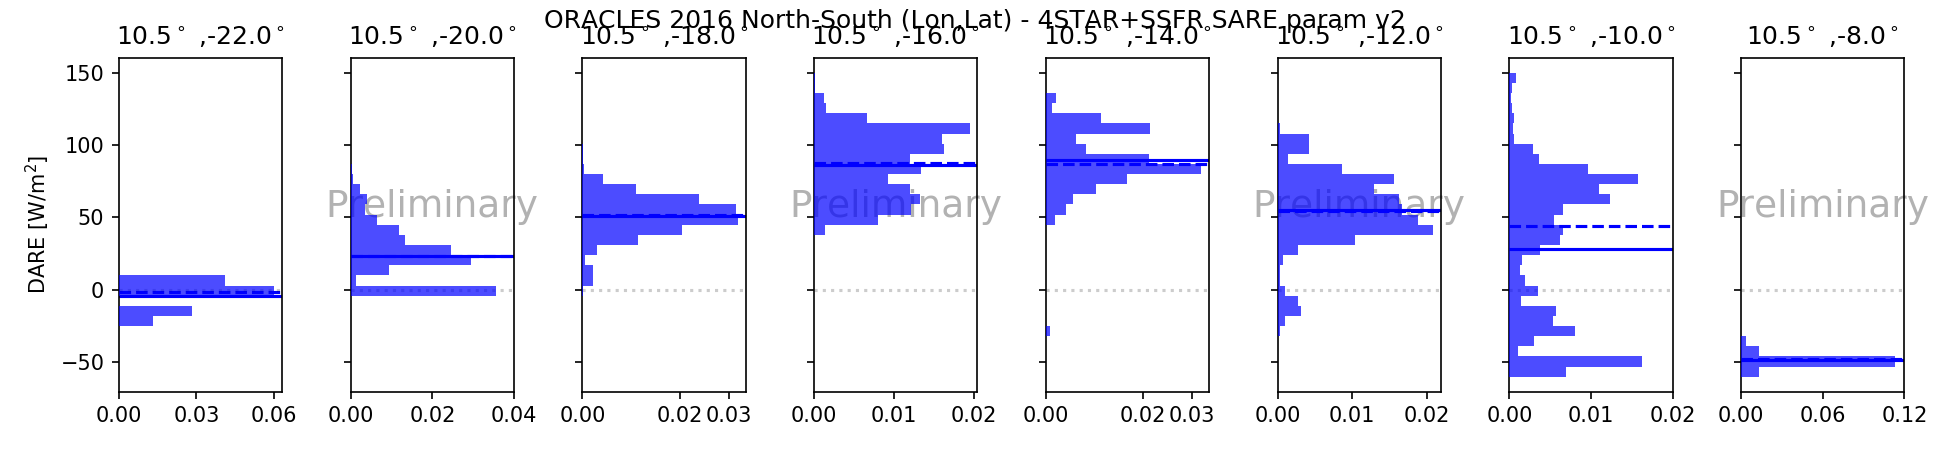

In [77]:
[fig,ax] = plt.subplots(1,8,figsize=(13,3))

for i,b in enumerate(boxes_ns_ct):
    ax[i].hist(bins_ns[i],bins=30,edgecolor='None',alpha=0.7,color='b',range=(-60,150),zorder=10,normed=True,orientation='horizontal')
    ax[i].axhline(np.nanmean(bins_ns[i]),color='b',label='mean')
    ax[i].axhline(np.nanmedian(bins_ns[i]),color='b',linestyle='--',label='median')
    xmin, xmax = ax[i].get_xlim()
    ax[i].set_xticks(np.round(np.linspace(xmin, xmax, 3), 2))
    ax[i].axhline(0,ls=':',color='k',alpha=0.2)
    if i>0:
        [ag.set_visible(False) for ag in ax[i].yaxis.get_ticklabels()]
    ax[i].set_title('{}$^\\circ$ ,{}$^\\circ$'.format(b[0],b[1]))
    if i%2: pu.prelim(ax[i])
ax[0].set_ylabel('DARE [W/m$^2$]')
fig.suptitle('ORACLES 2016 North-South (Lon,Lat) - 4STAR+SSFR SARE param v2')
fig.tight_layout()
plt.savefig(fp+'plot/ORACLES_2016_DARE_ns_boxes_v2.png',dpi=600,transparent=True)

In [203]:
dat_out = {'dare':dare,'bins_diag':bins_diag,'bins_ew':bins_ew,'bins_ns':bins_ns,
           'boxes_diag':boxes_diag,'boxes_ew':boxes_ew,'boxes_ns':boxes_ns,
           'boxes_diag_ct':boxes_diag_ct,'boxes_ew_ct':boxes_ew_ct,'boxes_ns_ct':boxes_ns_ct,
           'lon':ar['LON'][igood],'lat':ar['LAT'][igood],'sza':ar['meas'].sza[igood],
           'doy':ar['doy'][igood],'utc':ar['meas'].utc[igood]}
sio.savemat(fp+'ORACLES_2016_DARE_params_v3.mat',dat_out)

<IPython.core.display.Javascript object>


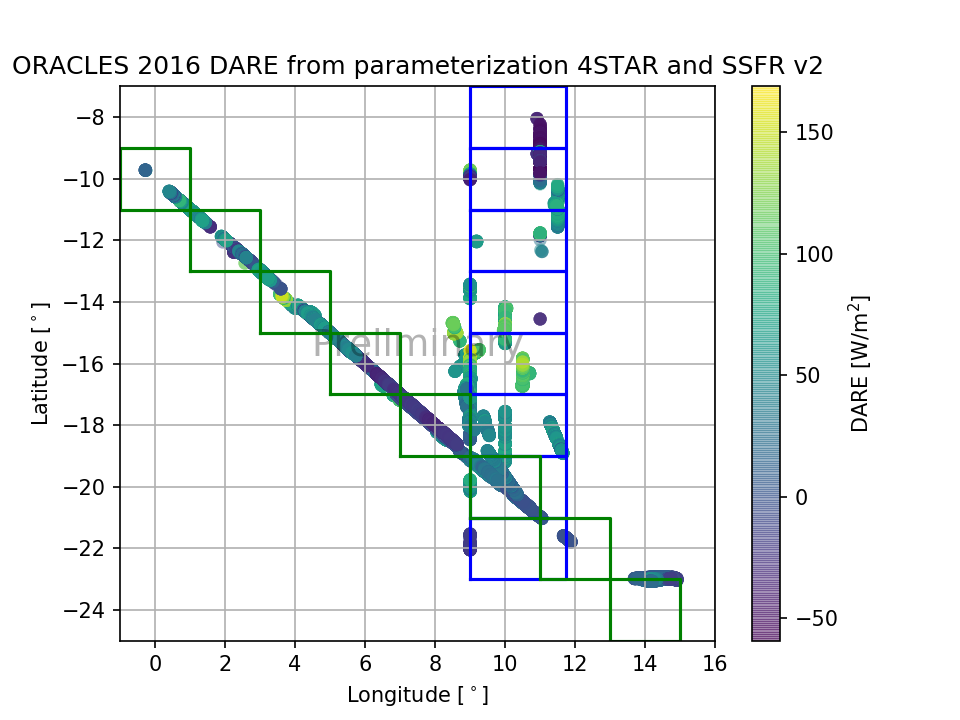

In [78]:
plt.figure()
sca = plt.scatter(ar['LON'][igood],ar['LAT'][igood],c=dare,edgecolor='None',s=40,alpha=0.5,cmap=plt.cm.viridis)
plt.grid()
plt.xlim(-1,16)
plt.xlabel('Longitude [$^\\circ$]')
plt.ylabel('Latitude [$^\\circ$]')
cb = plt.colorbar(sca)
cb.set_label('DARE [W/m$^2$]')
pu.prelim()

for i,b in enumerate(boxes_ns): 
    plt.plot([b[0],b[0],b[1],b[1],b[0]],[b[2],b[3],b[3],b[2],b[2]],'-b')
for i,b in enumerate(boxes_diag): 
    plt.plot([b[0],b[0],b[1],b[1],b[0]],[b[2],b[3],b[3],b[2],b[2]],'-g')

plt.ylim(-25,-7)
plt.title('ORACLES 2016 DARE from parameterization 4STAR and SSFR v2')
plt.savefig(fp+'plot/ORACLES_2016_DARE_v2_map_param.png',dpi=600,transparent=True)

## Save to file for easier loading

In [119]:
kar = ar.keys()
kar.sort()
kar

['ALT',
 'AOD_500',
 'AOD_550',
 'DN1020',
 'DN1064',
 'DN1250',
 'DN1650',
 'DN2100',
 'DN415',
 'DN440',
 'DN500',
 'DN675',
 'DN870',
 'DN990',
 'HEAD',
 'LAT',
 'LON',
 'PITCH',
 'ROLL',
 'Start_UTC',
 'UP1020',
 'UP1064',
 'UP1250',
 'UP1650',
 'UP2100',
 'UP415',
 'UP440',
 'UP500',
 'UP675',
 'UP870',
 'UP990',
 'a0',
 'a1',
 'a2',
 'airmass',
 'days',
 'doy',
 'flagacaod',
 'meas',
 'sza']

In [120]:
ar['days']

array([ 0.,  0.,  0., ..., 13., 13., 13.])

In [121]:
days

['20160830',
 '20160831',
 '20160902',
 '20160904',
 '20160906',
 '20160908',
 '20160910',
 '20160912',
 '20160914',
 '20160918',
 '20160920',
 '20160924',
 '20160925',
 '20160927']

### Save for hong in numpy pickle

In [122]:
from datetime import datetime

In [123]:
doy = np.array([datetime.strptime(days[int(a)],'%Y%m%d').timetuple().tm_yday for a in ar['days']])

In [124]:
doy

array([243, 243, 243, ..., 271, 271, 271])

In [125]:
out = {'sza':ar['sza'][igood],'dare':dare,'lon':ar['LON'][igood],'lat':ar['LAT'][igood],
       'albedo_0500':ar['meas'].Rvis[igood],'albedo_1650':ar['meas'].Rnir[igood],'AOD_550':ar['AOD_550'][igood],
       'UTC':ar['Start_UTC'][igood],'alt':ar['ALT'][igood],'day_of_year':doy[igood]}

In [86]:
np.save(fp+'ORACLES_2016_DARE_Above_cloud_for_Hong_v2.npy',out,allow_pickle=True)

In [87]:
for k in out.keys():
    print k,out[k].shape

AOD_550 (31371,)
albedo_0500 (31371,)
albedo_1650 (31371,)
UTC (31371,)
lat (31371,)
alt (31371,)
sza (31371,)
lon (31371,)
day_of_year (31371,)
dare (31371,)


### Load from numpy pickle

In [88]:
in_ = np.load(fp+'ORACLES_2016_DARE_Above_cloud_for_Hong_v2.npy',allow_pickle=True).item()

In [89]:
ar = in_

In [90]:
ar.keys()

['UTC',
 'sza',
 'lon',
 'day_of_year',
 'AOD_550',
 'lat',
 'albedo_0500',
 'alt',
 'albedo_1650',
 'dare']

## set up the LUT

In [126]:
lut.keys()

[u'tau',
 u'rad',
 'ref_hi',
 'tau_hi',
 u'lut_details',
 'Rnir_hi',
 u'sza',
 'Rvis',
 u'irr_dn_diff',
 u'irr_dn',
 u'zout',
 'Rnir',
 u'wvl',
 u'phase',
 'Rvis_hi',
 u'ref',
 u'irr_up']

In [127]:
lut['tau'].shape, lut['ref'].shape, lut['sza'].shape, lut['irr_dn'].shape, lut['wvl'].shape, lut['zout'], lut['phase']

((27,), (35,), (48,), (1, 2, 3, 35, 27, 48), (2,), [0.2, 1.5, 100.0], ['wc'])

In [128]:
nref = len(lut['ref'])
ntau = len(lut['tau'])
nsza = len(lut['sza'])

In [129]:
lut['Rvis'] = np.zeros([nref,ntau,nsza])
lut['Rnir'] = np.zeros([nref,ntau,nsza])

In [130]:
for ir,r in enumerate(lut['ref']):
    for it,t in enumerate(lut['tau']):
        for iz,s in enumerate(lut['sza']):
            lut['Rvis'][ir,it,iz] = lut['irr_up'][0,0,1,ir,it,iz]/lut['irr_dn'][0,0,1,ir,it,iz]
            lut['Rnir'][ir,it,iz] = lut['irr_up'][0,1,1,ir,it,iz]/lut['irr_dn'][0,1,1,ir,it,iz]

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [131]:
lut['sza']

array([11.36487697, 20.83969366, 26.76550058, 31.2732978 , 34.94801372,
       38.05665663, 40.74905438, 43.11972483, 45.23300465, 47.13508975,
       48.86048959, 50.43578157, 51.88193569, 53.21582641, 54.451256  ,
       55.5996703 , 56.67067347, 57.67240684, 58.61183354, 59.49495605,
       60.3269852 , 61.11247301, 61.85541869, 62.55935386, 63.22741194,
       63.86238505, 64.46677106, 65.04281282, 65.59253108, 66.11775223,
       66.62013188, 67.10117502, 67.56225324, 68.00461964, 68.4294217 ,
       68.83771245, 69.23046027, 69.60855741, 69.97282752, 70.32403224,
       70.6628771 , 70.99001664, 71.30605908, 71.61157038, 71.90707798,
       72.193074  , 72.47001827, 72.73834093])

### Make a hires version of the LUT

In [132]:
lut['tau_hi'] = np.hstack([np.arange(1.0,25,0.5),np.arange(25,50,1),np.arange(50,102.5,2.5)])
lut['ref_hi'] = np.hstack([np.arange(0,15,0.25),np.arange(15,30.5,0.5)])

In [133]:
len(lut['tau_hi']), len(lut['ref_hi'])

(94, 91)

In [134]:
lut['Rvis_hi'] = np.zeros([91,94,48])
lut['Rnir_hi'] = np.zeros([91,94,48])

In [135]:
for i,z in enumerate(lut['sza']):
    fv = interpolate.RectBivariateSpline(lut['ref'][0:23],lut['tau'],lut['Rvis'][0:23,:,i],kx=1,ky=1)
    lut['Rvis_hi'][:,:,i] = fv(lut['ref_hi'],lut['tau_hi'])
    fn = interpolate.RectBivariateSpline(lut['ref'][0:23],lut['tau'],lut['Rnir'][0:23,:,i],kx=1,ky=1)
    lut['Rnir_hi'][:,:,i] = fn(lut['ref_hi'],lut['tau_hi'])

<IPython.core.display.Javascript object>


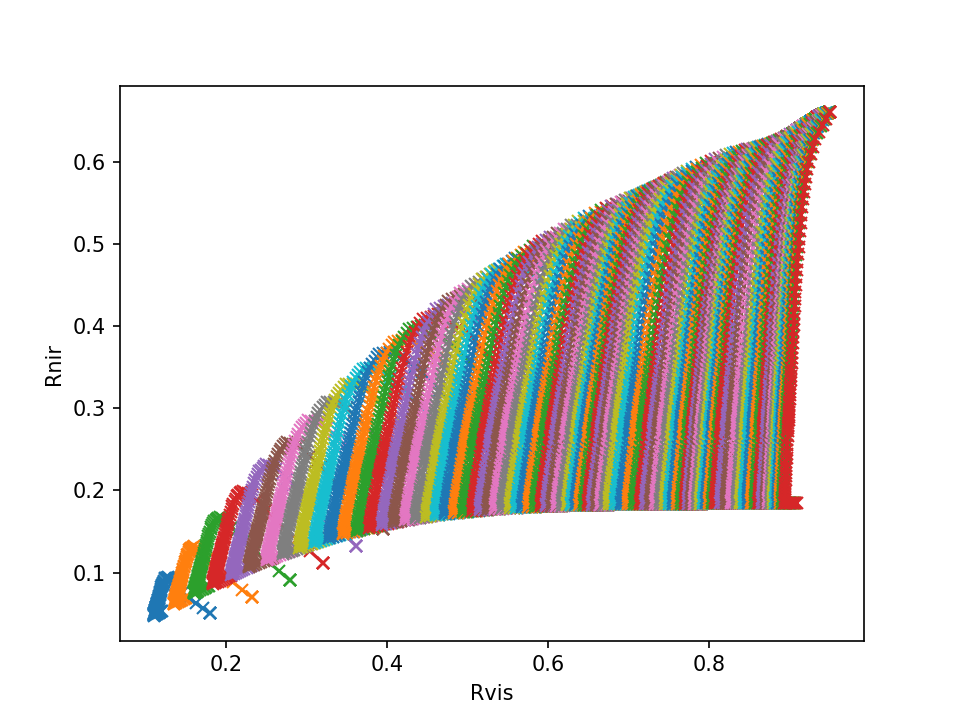

Text(0,0.5,'Rnir')

In [136]:
plt.figure()
for i,r in enumerate(lut['tau_hi']):
    plt.plot(lut['Rvis_hi'][:,i,0],lut['Rnir_hi'][:,i,0],'x-')
plt.xlabel('Rvis')
plt.ylabel('Rnir')

In [137]:
plt.figure()
plt.plot(lut['tau_hi'],lut['Rvis_hi'][40,:,0],'.')

<IPython.core.display.Javascript object>

# Run the retrieval

In [204]:
vv = 'v3' # Found the bug in the ki^2 retrieval, missing the normalization, moved to 2100 nm instead of 1650 nm

In [205]:
ar['tau'], ar['ref'] = np.zeros_like(ar['sza'])*np.nan,np.zeros_like(ar['sza'])*np.nan

In [206]:
ar['ki'] = np.zeros_like(ar['sza'])

In [207]:
ar['isza'] = []

<IPython.core.display.Javascript object>


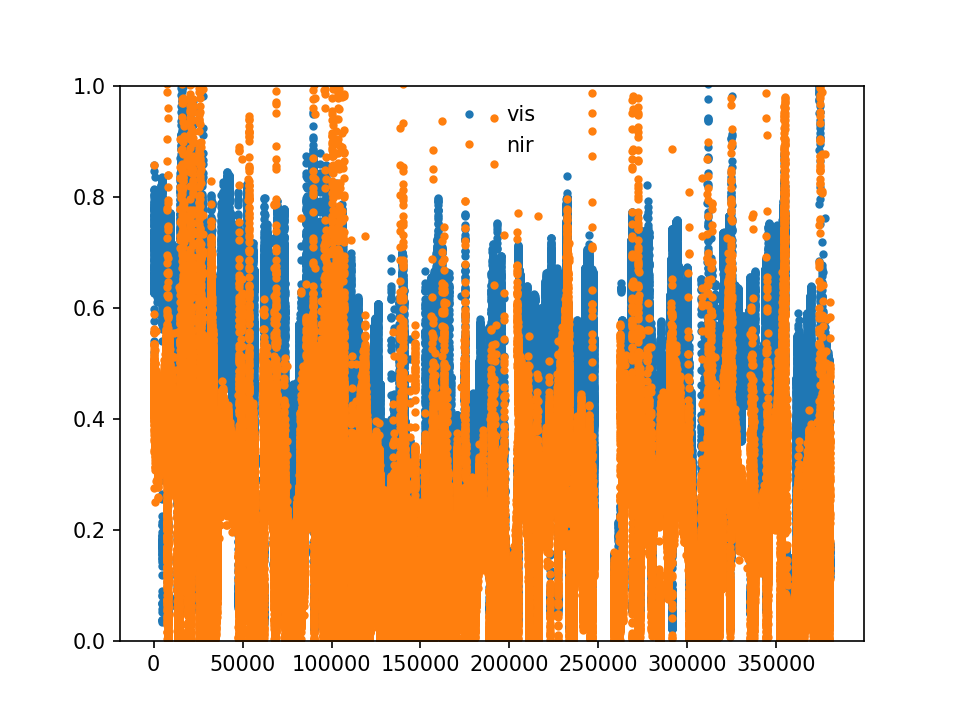

(0, 1)

In [208]:
plt.figure()
plt.plot(ar['meas'].Rvis,'.',label='vis')
plt.plot(ar['meas'].Rnir,'.',label='nir')
plt.legend(frameon=False)
plt.ylim(0,1)

<IPython.core.display.Javascript object>


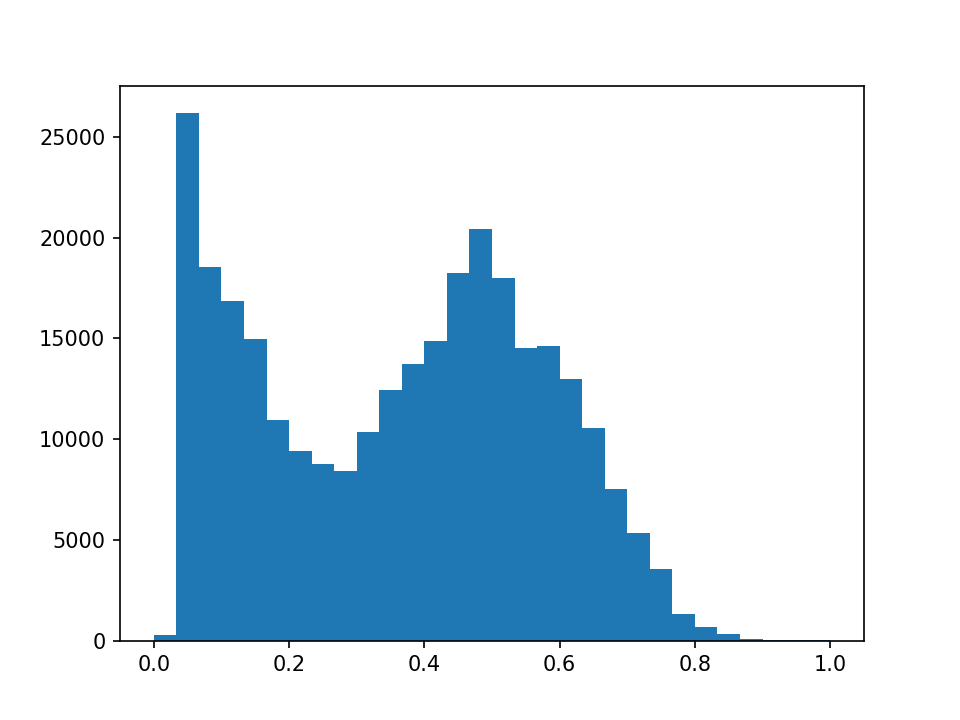

(array([3.0500e+02, 2.6194e+04, 1.8543e+04, 1.6854e+04, 1.4960e+04,
        1.0949e+04, 9.4110e+03, 8.7930e+03, 8.4060e+03, 1.0365e+04,
        1.2455e+04, 1.3713e+04, 1.4864e+04, 1.8263e+04, 2.0436e+04,
        1.7992e+04, 1.4547e+04, 1.4636e+04, 1.3008e+04, 1.0575e+04,
        7.5350e+03, 5.3420e+03, 3.5820e+03, 1.3270e+03, 6.8900e+02,
        3.1700e+02, 8.1000e+01, 4.3000e+01, 3.0000e+01, 2.3000e+01]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

In [209]:
plt.figure()
plt.hist(ar['meas'].Rvis,range=[0,1],bins=30)

In [210]:
rvis,rnir = np.zeros(len(ar['tau']))+np.nan,np.zeros(len(ar['tau']))+np.nan
rvis_mod,rnir_mod = np.zeros(len(ar['tau']))+np.nan,np.zeros(len(ar['tau']))+np.nan

In [211]:
pbar = tqdm(total=len(ar['sza']))
for i,s in enumerate(ar['sza']):
    pbar.update()
    if (s>73.0) | (np.isnan(s)):
        continue
    if not i in igood:
        continue
    isza = np.argmin(np.abs(lut['sza']-s))
    ar['isza'].append(isza)
    ki = ((ar['meas'].Rvis[i]-lut['Rvis_hi'][:,:,isza])/ar['meas'].Rvis[i])**2+\
         ((ar['meas'].Rnir[i]-lut['Rnir_hi'][:,:,isza])/ar['meas'].Rnir[i])**2
    kimin = np.unravel_index(np.nanargmin(ki),ki.shape)
    rvis[i] = ar['meas'].Rvis[i]
    rnir[i] = ar['meas'].Rnir[i]
    rvis_mod[i] = lut['Rvis_hi'][kimin[0],kimin[1],isza]
    rnir_mod[i] = lut['Rnir_hi'][kimin[0],kimin[1],isza]
    ar['ki'][i] = np.nanmin(ki)
    ar['tau'][i],ar['ref'][i] = lut['tau_hi'][kimin[1]],lut['ref_hi'][kimin[0]]
    if ar['meas'].Rvis[i]<np.nanmin(lut['Rvis_hi'][:,:,isza]):
        ar['tau'][i] = 0.0
        ar['ref'][i] = 0.0
    if ar['meas'].Rnir[i]<np.nanmin(lut['Rnir_hi'][:,:,isza]):
        ar['tau'][i] = 0.0
        ar['ref'][i] = 0.0

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


A Jupyter Widget

## Filter out bad data

In [212]:
(lut['Rvis_hi'][5,6,isza] - lut['Rvis_hi'][5,7,isza])**2+(lut['Rnir_hi'][5,6,isza]-lut['Rnir_hi'][5,7,isza])**2

0.0006771335415500987

In [213]:
(lut['Rvis_hi'][10,6,isza] - lut['Rvis_hi'][10,7,isza])**2+(lut['Rnir_hi'][10,6,isza]-lut['Rnir_hi'][10,7,isza])**2

0.0006383679852251727

In [214]:
(lut['Rvis_hi'][0,6,isza] - lut['Rvis_hi'][0,7,isza])**2+(lut['Rnir_hi'][0,6,isza]-lut['Rnir_hi'][0,7,isza])**2

0.0006842858650528748

In [169]:
dki= 0.001

In [188]:
ar['ibad'] = (ar['ki']>dki) | (ar['tau']==0) | (ar['ref']==0) | (ar['ref']>25.0)

/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [189]:
ar['tau'][ar['ibad']] = np.nan
ar['ref'][ar['ibad']] = np.nan

## Sanity check retrieved outputs

In [219]:
plt.figure()
plt.plot(rvis,rvis_mod,'.')
plt.plot([0,1],[0,1],'k--',alpha=0.6)
plt.xlabel('Measurements')
plt.ylabel('Model')
plt.title('vis Reflectance [500 nm]')


<IPython.core.display.Javascript object>

Text(0.5,1,'vis Reflectance [500 nm]')

In [220]:
plt.figure()
plt.plot(rnir,rnir_mod,'.')
plt.plot([0,1],[0,1],'k--',alpha=0.6)
plt.xlabel('Measurements')
plt.ylabel('Model')
plt.title('NIR Reflectance [2100 nm]')


<IPython.core.display.Javascript object>

Text(0.5,1,'NIR Reflectance [2100 nm]')

<IPython.core.display.Javascript object>


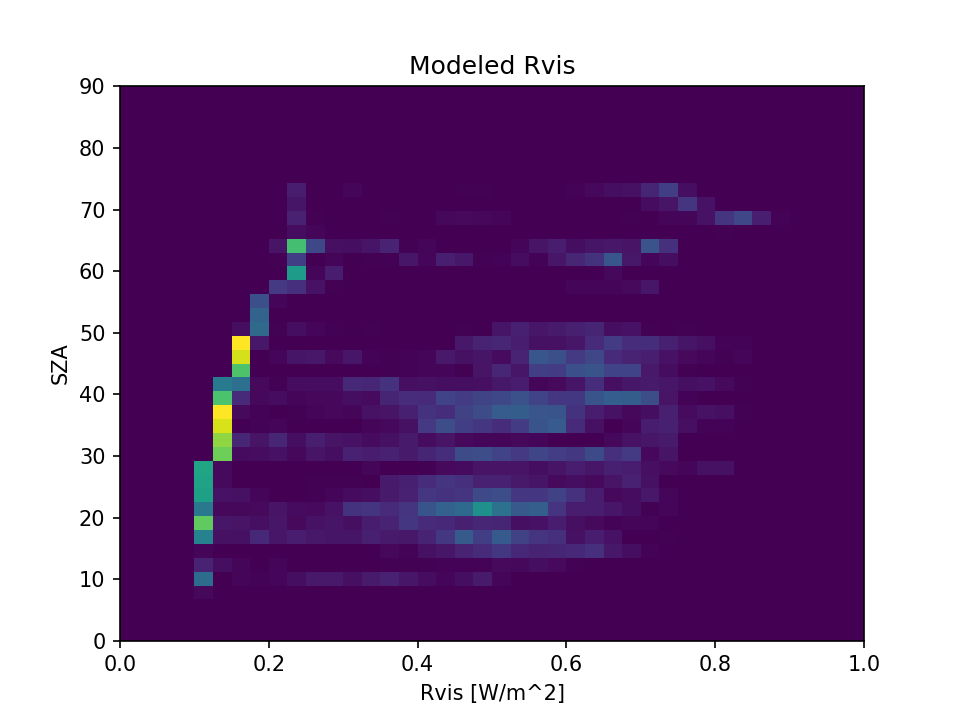

Text(0,0.5,'SZA')

In [221]:
plt.figure()
plt.hist2d(rvis_mod[igood],ar['meas'].sza[igood],bins=40,range=[[0,1],[0,90]])
plt.title('Modeled Rvis')
plt.xlabel('Rvis [W/m^2]')
plt.ylabel('SZA')


<IPython.core.display.Javascript object>


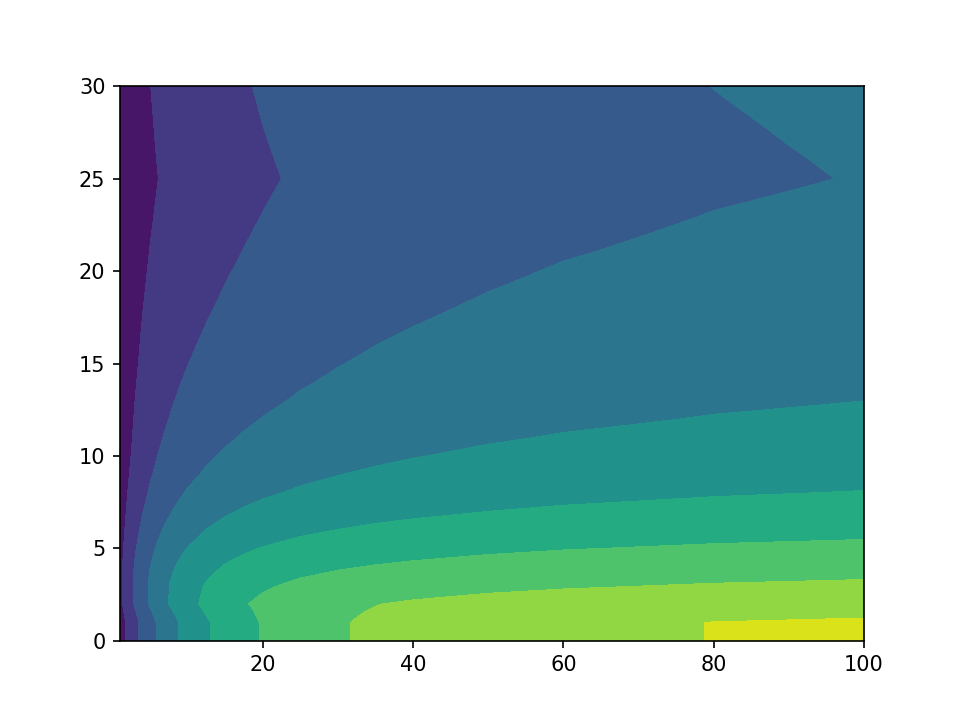

In [181]:
plt.figure()
plt.contourf(lut['tau_hi'],lut['ref_hi'],ki)

<IPython.core.display.Javascript object>


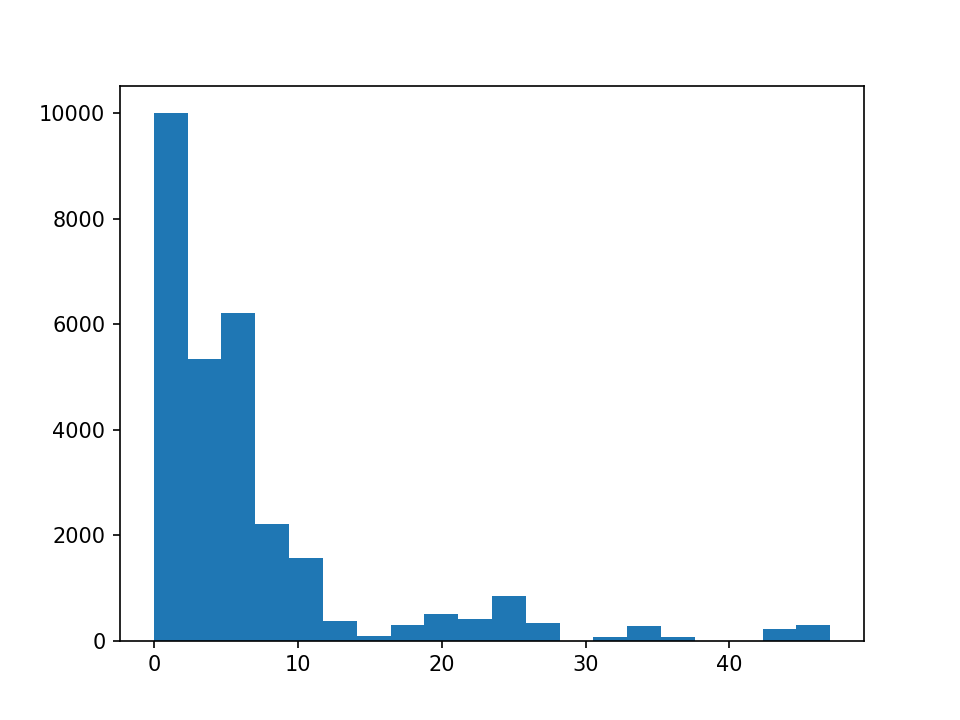

(array([1.0003e+04, 5.3450e+03, 6.2010e+03, 2.2150e+03, 1.5730e+03,
        3.7900e+02, 9.9000e+01, 2.9000e+02, 5.0000e+02, 4.2200e+02,
        8.4500e+02, 3.4500e+02, 3.0000e+00, 7.5000e+01, 2.8900e+02,
        8.1000e+01, 0.0000e+00, 0.0000e+00, 2.1600e+02, 2.9800e+02]),
 array([ 0.  ,  2.35,  4.7 ,  7.05,  9.4 , 11.75, 14.1 , 16.45, 18.8 ,
        21.15, 23.5 , 25.85, 28.2 , 30.55, 32.9 , 35.25, 37.6 , 39.95,
        42.3 , 44.65, 47.  ]),
 <a list of 20 Patch objects>)

In [182]:
plt.figure()
plt.hist(ar['isza'],bins=20)

# Plot the retrieval results

<IPython.core.display.Javascript object>


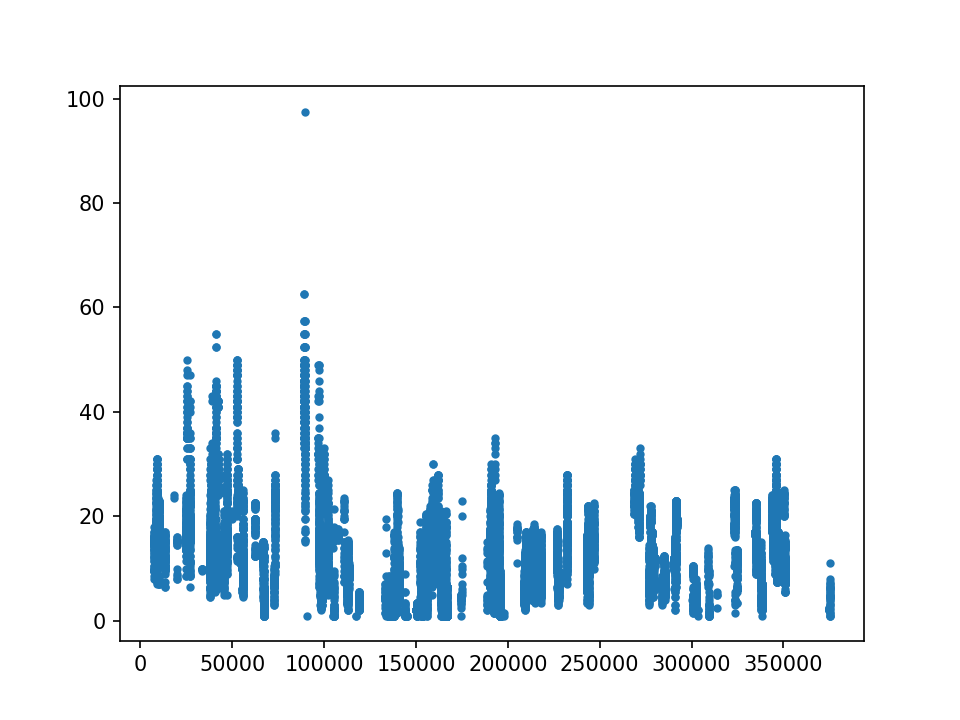

In [183]:
plt.figure()
plt.plot(ar['tau'],'.')

In [191]:
np.nanmean(ar['tau']),np.nanmean(ar['ref'])

(12.649143441575045, 12.169048836614676)

<IPython.core.display.Javascript object>


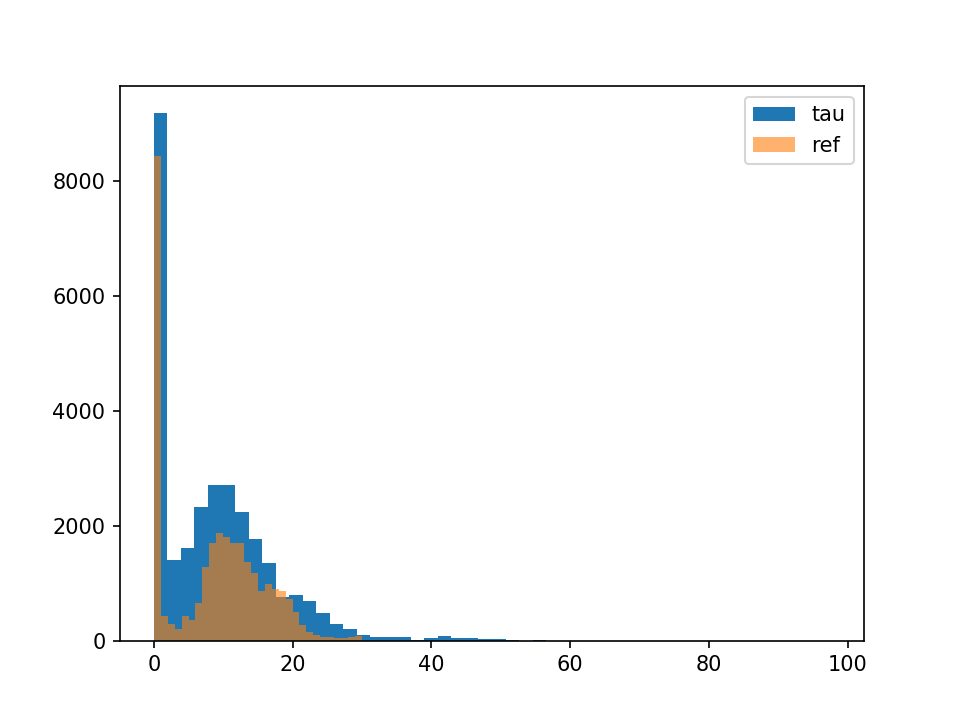

In [222]:
plt.figure()
plt.hist(ar['tau'][np.isfinite(ar['tau'])],bins=50,label='tau')
plt.hist(ar['ref'][np.isfinite(ar['ref'])],bins=30,label='ref',alpha=0.6)
plt.legend()

<IPython.core.display.Javascript object>


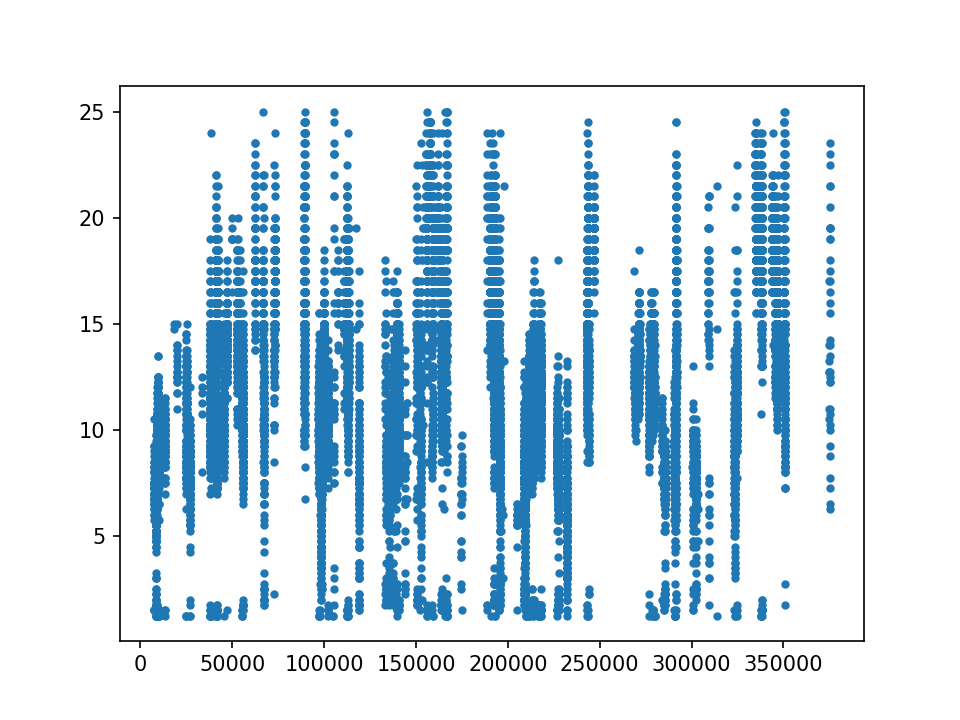

In [192]:
plt.figure()
plt.plot(ar['ref'],'.')

In [193]:
len(np.where(np.isfinite(ar['ref']))[0])

19555

In [194]:
len(ar['ref'])

380923

<IPython.core.display.Javascript object>


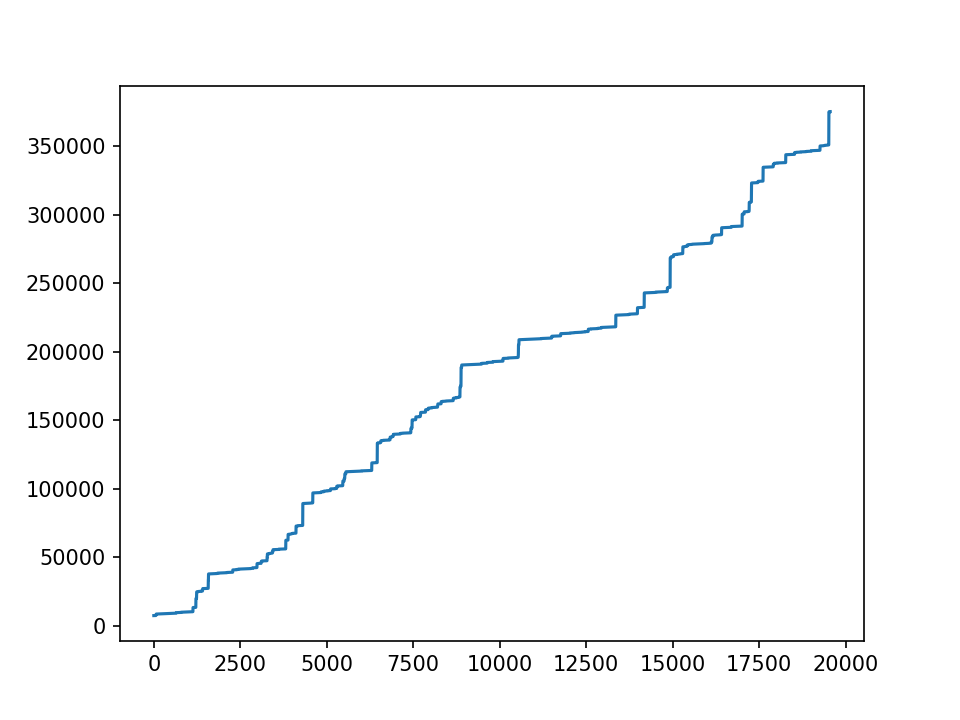

In [195]:
plt.figure()
plt.plot(np.where(np.isfinite(ar['ref']))[0])

# Save the retrieved output

In [223]:
out = {}

In [224]:
kk = ar.keys()
kk.sort()
kk

['ALT',
 'AOD_500',
 'AOD_550',
 'DN1020',
 'DN1064',
 'DN1250',
 'DN1650',
 'DN2100',
 'DN415',
 'DN440',
 'DN500',
 'DN675',
 'DN870',
 'DN990',
 'HEAD',
 'LAT',
 'LON',
 'PITCH',
 'ROLL',
 'Start_UTC',
 'UP1020',
 'UP1064',
 'UP1250',
 'UP1650',
 'UP2100',
 'UP415',
 'UP440',
 'UP500',
 'UP675',
 'UP870',
 'UP990',
 'a0',
 'a1',
 'a2',
 'airmass',
 'days',
 'doy',
 'flagacaod',
 'ibad',
 'isza',
 'ki',
 'meas',
 'ref',
 'sza',
 'tau']

In [198]:
plt.figure()
plt.plot(ar['isza'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


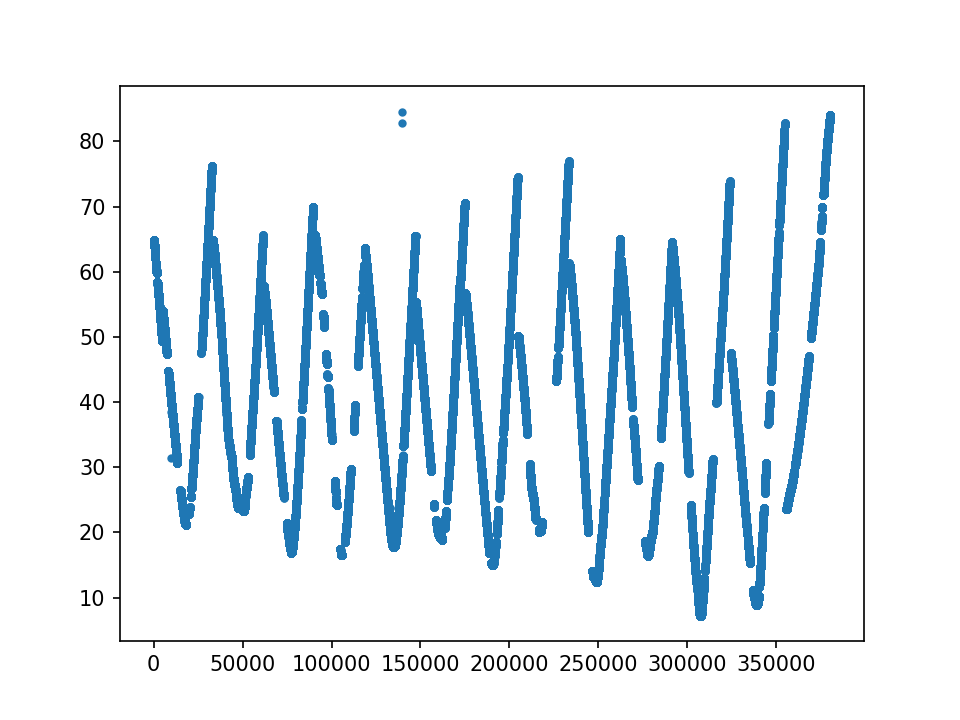

In [94]:
plt.figure()
plt.plot(ar['sza'],'.')

In [225]:
out['tau'] = ar['tau']
out['ref'] = ar['ref']
out['ki'] = ar['ki']
out['sza'] = ar['sza']
out['aod'] = ar['AOD_500']
out['days'] = ar['days']
out['utc'] = ar['Start_UTC']
out['lat'] = ar['LAT']
out['lon'] = ar['LON']
out['a0'],out['a1'],out['a2'] = ar['a0'],ar['a1'],ar['a2']
out['Rvis'] = ar['meas'].Rvis
out['Rnir'] = ar['meas'].Rnir
out['Rvis_mod'] = rvis_mod
out['Rnir_mod'] = rnir_mod


In [226]:
fp

u'/data/sam/ORACLES/'

In [227]:
hs.savemat(fp+'data_other/ssfr_2016_retrieved_COD_{}.mat'.format(vv),out)

/home/sam/.local/lib/python2.7/site-packages/hdf5storage/__init__.py:1234: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(filename)


In [228]:
out['days']

array([ 0.,  0.,  0., ..., 13., 13., 13.])

# Load the results of the CRE calculations
See the ORACLES_cld_CRE_from_SSFR jupyter notebook for details

In [273]:
c = hs.loadmat(fp+'rtm/ORACLES_CRE_v6_irr.mat')

In [274]:
c.keys()

[u'ssfr_aero_CRE', u'ssfr_aero_CRE_clear', u'ssfr_aero_C']

In [276]:
c['ssfr_aero_CRE'].keys()

[u'dn', u'up']

In [277]:
CRE_toa = c['ssfr_aero_CRE']['up'][:,2]-c['ssfr_aero_CRE_clear']['up'][:,2]

In [282]:
flt = np.isfinite(out['aod']) & (CRE_toa>0.0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [294]:
out['days']

array([  0.,   0.,   0., ...,  13.,  13.,  13.])

<IPython.core.display.Javascript object>


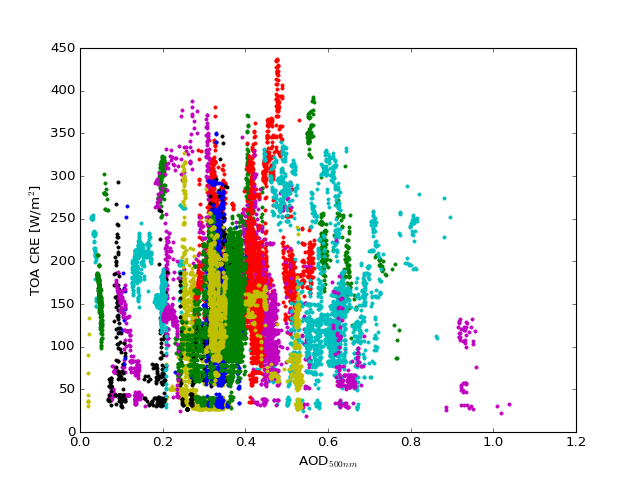

In [295]:
plt.figure()
for i in np.unique(out['days']):
    fi = np.where((flt==1) & (i==out['days']))
    plt.plot(out['aod'][fi],CRE_toa[fi],'.')
plt.xlabel('AOD$_{{500nm}}$')
plt.ylabel('TOA CRE [W/m$^2$]')

In [284]:
plt.figure()
plt.plot(out['aod'][flt],c['ssfr_aero_C'][flt,0],'.')
plt.xlabel('AOD$_{{500nm}}$')
plt.ylabel('Surface CRE [W/m$^2$]')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


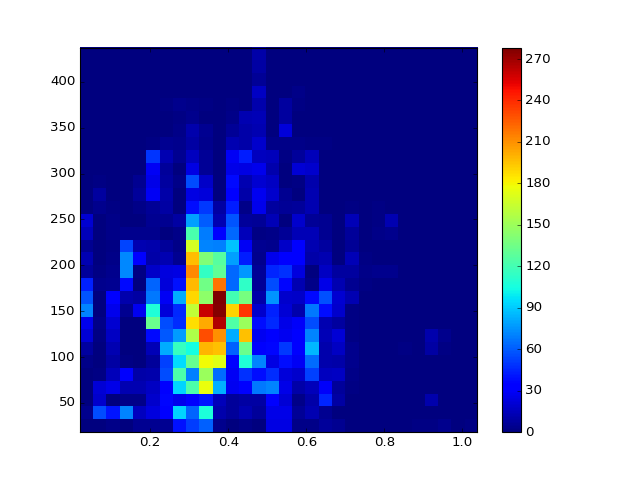

In [293]:
plt.figure()
plt.cm.viridis
plt.hist2d(out['aod'][flt],CRE_toa[flt],bins=30)
plt.colorbar()

In [300]:
import seaborn as sns
import plotting_utils as pu

In [299]:
plt.figure()
#plt.hexbin(out['aod'][flt],CRE_toa[flt])
sns.kdeplot(out['aod'][flt],CRE_toa[flt], shade=True)

<IPython.core.display.Javascript object>

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


<IPython.core.display.Javascript object>


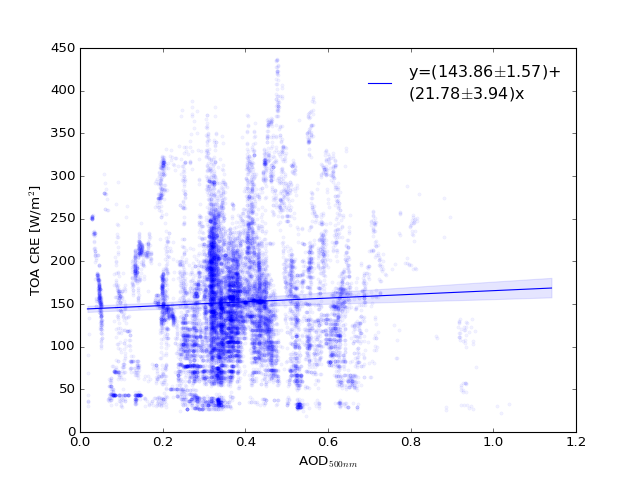

In [307]:
plt.figure()
plt.plot(out['aod'][flt],CRE_toa[flt],'.',alpha=0.05)
pu.plot_lin(out['aod'][flt],CRE_toa[flt])
plt.legend(frameon=False)
plt.xlabel('AOD$_{{500nm}}$')
plt.ylabel('TOA CRE [W/m$^2$]')

<IPython.core.display.Javascript object>


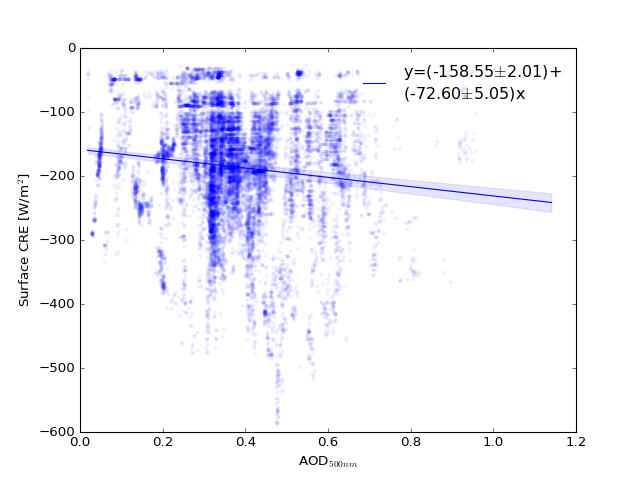

In [308]:
plt.figure()
plt.plot(out['aod'][flt],c['ssfr_aero_C'][flt,0],'.',alpha=0.05)
pu.plot_lin(out['aod'][flt],c['ssfr_aero_C'][flt,0])
plt.legend(frameon=False)
plt.xlabel('AOD$_{{500nm}}$')
plt.ylabel('Surface CRE [W/m$^2$]')

<IPython.core.display.Javascript object>


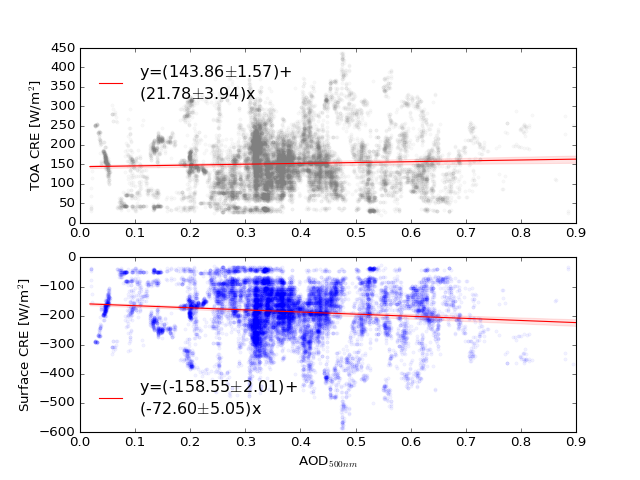

(0, 0.9)

In [324]:
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(out['aod'][flt],CRE_toa[flt],'.',color='grey',alpha=0.05)
pu.plot_lin(out['aod'][flt],CRE_toa[flt],color='r')
plt.legend(frameon=False,loc=2)
plt.ylabel('TOA CRE [W/m$^2$]')
plt.xlim(0,.9)

ax2 = plt.subplot(2,1,2)
plt.plot(out['aod'][flt],c['ssfr_aero_C'][flt,0],'.',color='blue',alpha=0.05)
pu.plot_lin(out['aod'][flt],c['ssfr_aero_C'][flt,0],color='r')
plt.legend(frameon=False,loc=3)
plt.xlabel('AOD$_{{500nm}}$')
plt.ylabel('Surface CRE [W/m$^2$]')
plt.xlim(0,.9)

In [325]:
rCRE_toa = CRE_toa/c['ssfr_aero_CRE']['dn'][:,2]*100.0
rCRE_sur = c['ssfr_aero_C'][:,0]/c['ssfr_aero_CRE']['dn'][:,2]*100.0

<IPython.core.display.Javascript object>


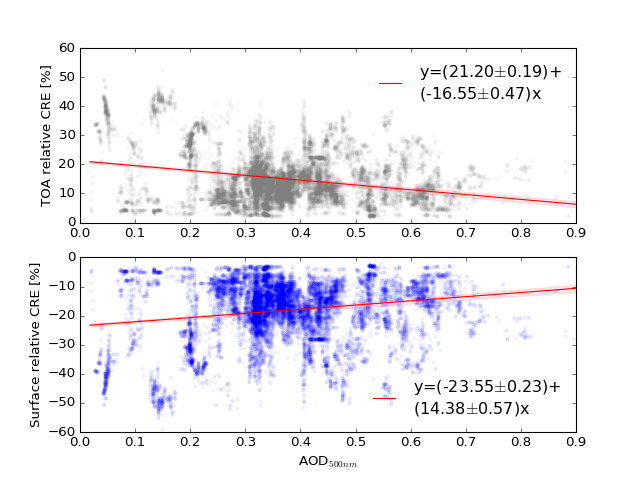

(0, 0.9)

In [328]:
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(out['aod'][flt],rCRE_toa[flt],'.',color='grey',alpha=0.05)
pu.plot_lin(out['aod'][flt],rCRE_toa[flt],color='r',ci=0.99)
plt.legend(frameon=False,loc=1)
plt.ylabel('TOA relative CRE [%]')
plt.xlim(0,.9)

ax2 = plt.subplot(2,1,2)
plt.plot(out['aod'][flt],rCRE_sur[flt],'.',color='blue',alpha=0.05)
pu.plot_lin(out['aod'][flt],rCRE_sur[flt],color='r',ci=0.99)
plt.legend(frameon=False,loc=4)
plt.xlabel('AOD$_{{500nm}}$')
plt.ylabel('Surface relative CRE [%]')
plt.xlim(0,.9)

In [330]:
help(pu.make_boxplot)

Help on function make_boxplot in module plotting_utils:

make_boxplot(vals, val_lim, lims, pos, color='green', label=None, y=0, alpha=1.0, ax=None, vert=True, fliers_off=False)
    Compile the functions to make a box plot
    
    vals: values to box
    val_lim: values to use as basis for binning
    lims: limits of the bins to use
    pos: center position of the limites
    y:?
    vert: (default True) if True, return vertical boxes, false for horizontal boxes
    fliers_off: (default False) if True, turns off the plotting of the outliers



In [337]:
lims = np.arange(0,1.3,0.1)
pos = np.arange(0.05,1.2,0.1)

In [339]:
lims,pos,len(lims),len(pos)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2]),
 array([ 0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,  0.85,
         0.95,  1.05,  1.15]),
 13,
 12)

In [362]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'

In [404]:
plt.figure()
ax1 = plt.subplot(2,1,1)
pu.make_boxplot(rCRE_toa[flt],out['aod'][flt],lims,pos,color='k',fliers_off=True,widths=0.09,patch_artist=True,alpha=0.5)
pu.plot_lin(out['aod'][flt],rCRE_toa[flt],color='r',ci=0.99,zorder=200)
plt.xlim(0.0,1.2)
plt.legend(frameon=False,loc=1)
plt.ylabel('TOA relative CRE [%]')

ax2 = plt.subplot(2,1,2)
pu.make_boxplot(rCRE_sur[flt],out['aod'][flt],lims,pos,color='blue',fliers_off=True,widths=0.09,patch_artist=True,alpha=0.6)
pu.plot_lin(out['aod'][flt],rCRE_sur[flt],color='r',ci=0.99,zorder=200)
plt.xlim(0.0,1.2)
plt.legend(frameon=False,loc=4)
plt.ylabel('Surface relative CRE [%]')
plt.xlabel('AOD$_{{500nm}}$')
plt.savefig(fp+'plot/SSFR_CRE_vs_AOD.png',transparent=True,dpi=600)

<IPython.core.display.Javascript object>

In [387]:
flo = (flt==1) & (out['tau']>0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


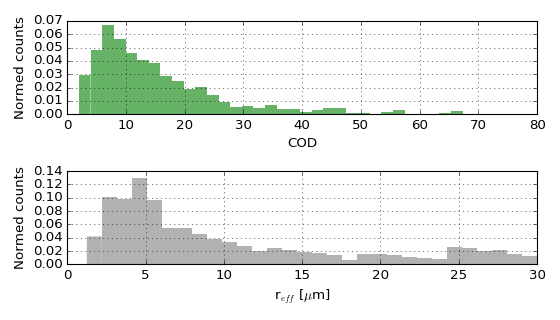

In [446]:
plt.figure(figsize=(7,4))
plt.subplot(2,1,1)
plt.hist(out['tau'][flo]*4.0,normed=True,edgecolor='None',color='g',alpha=0.6,bins=100)
plt.xlabel('COD')
plt.xlim(0,80)
plt.ylabel('Normed counts')
plt.grid()

plt.subplot(2,1,2)
plt.hist(out['ref'][flo],normed=True,edgecolor='None',color='grey',alpha=0.6,bins=30)
plt.xlabel('r$_{{eff}}$ [$\mu$m]')
plt.ylabel('Normed counts')
plt.grid()
plt.xlim(0,30)
plt.tight_layout()
plt.savefig(fp+'plot/SSFR_COD_ref_ORACLES2016_flagacaod.png',transparent=True,dpi=600)

In [445]:
np.nanmean(out['tau'][flo]*4.0)

15.043258528367728

In [408]:
import scipy.stats as st

In [449]:
a,xe,ye,bn = st.binned_statistic_2d(out['lat'][flo],out['lon'][flo],out['tau'][flo]*4.0,
                           bins=26,range=[[-25,-8],[0,16]],statistic='mean')
a = np.ma.masked_array(a,np.isnan(a))

<IPython.core.display.Javascript object>


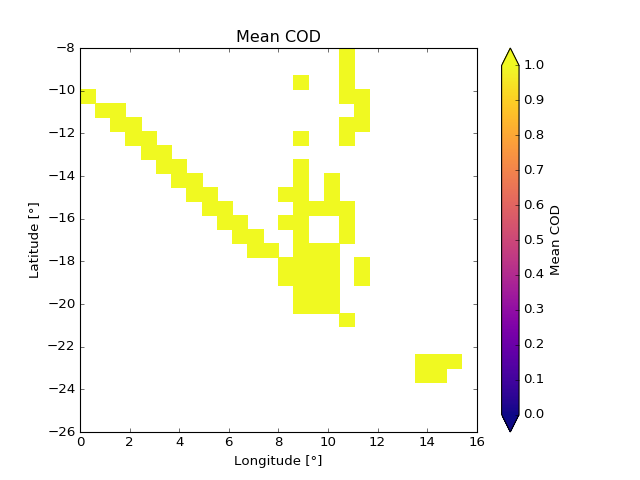

In [450]:
plt.figure()
p = plt.pcolor(ye,xe,a,vmin=0.0,vmax=1.0,cmap='plasma')

plt.xlabel(u'Longitude [°]')
plt.ylabel(u'Latitude [°]')
plt.title('Mean COD')

cb = plt.colorbar(p,extend='both')
cb.set_label('Mean COD')

In [405]:
np.nanmean(out['tau'][flo])

3.760814632091932

In [406]:
np.nanmean(out['ref'][flo])

10.23840322483605

In [394]:
fp

u'/mnt/c/Users/sleblanc/Research/ORACLES/'